# Imports

In [1]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd

#visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data

In [2]:
#loading data into a pandas dataframe
movies = pd.read_csv('data/movie_data.csv')

In [3]:
#inspecting the first five rows
movies.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Basic Data Exploration and Preparation

- **Number of entries** : There are a total of 5043 entries. 
- **Number of features and their types**: There are a total of 26 features with types: float64(12), int64(3), object(11)
- **Scale**: Scales differ greatly, namely *gross* and *budget* in comparison to other features.
- **Missing values:** total of 2685 missing values, highest % of missing values are the target value '*gross*' 17.52%, followed by '*budget*' 9.75%.
- **Duplicate rows**: There are total of 247 duplicated rows.
- **Categorical features**: color, director_name, actor_1_name, actor_2_name, actor_3_name, genres, movie_title, plot_keywords, language, country, content_rating
- **Numerical features**: num_critic_reviews, duration, director_facebook_likes, actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes, gross, num_users_voted, cast_total_facebook_likes, num_user_reviews, budget, title_year, movie_score, aspect_ratio, movie_facebook_likes

In [4]:
#fetching basic information on the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_reviews         4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_users_voted            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

**Missing values**

- There are total of 2685 missing values, highest % of missing values are the target value '*gross*' 17.52%, followed by '*budget*' 9.75%.
- The heatmap visualizes the nullity correlation between the columns in the dataset. We can clearly see that the heatmap shows no negative correlation between features, which means that if the value of one variable is present then the value of other variables is definitely absent. There are few no correlation spaces which represent that variables values present or absent do not have any effect on one another. Majority of correlations are in fact positive, and that indicates that if the value of one variable is present then the value of the other is definitely present. Positive correlations are highest among director_name, title_year, actor_2_name, actor_3_facebook_likes etc. Budget and gross show a low to medium positive correlation among all columns.

**Action taken**

As the number of missing values in the target value, as well as a potentially highly correlated independent variable budget, is high, and is present accross all columns, we will remove all missing features from the dataset. The time consumption of entering missing data exceeds this projects goals.

In [5]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', movies.isnull().values.sum())
print('Percent of missing values per feature: ') 
movies.isnull().sum() * 100 / len(movies)

Number of missing values:  2685
Percent of missing values per feature: 


color                         0.376760
director_name                 2.062265
num_critic_reviews            0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_users_voted               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
plot_keywords                 3.033908
num_user_reviews              0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
movie_score                   0.000000
aspect_ratio                  6.523895
movie_facebook_likes     

<AxesSubplot:>

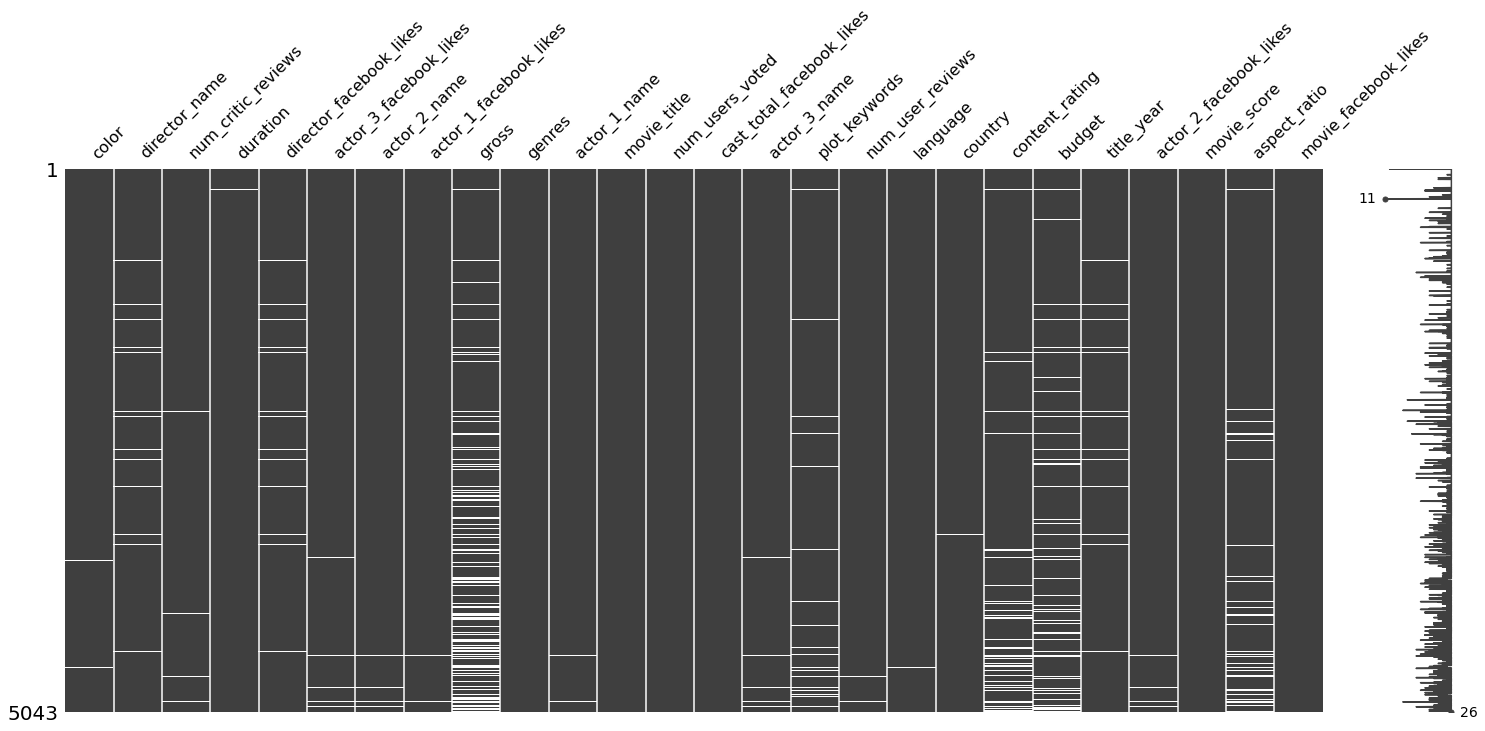

In [6]:
#matrix map of missing values
msno.matrix(movies)

<AxesSubplot:>

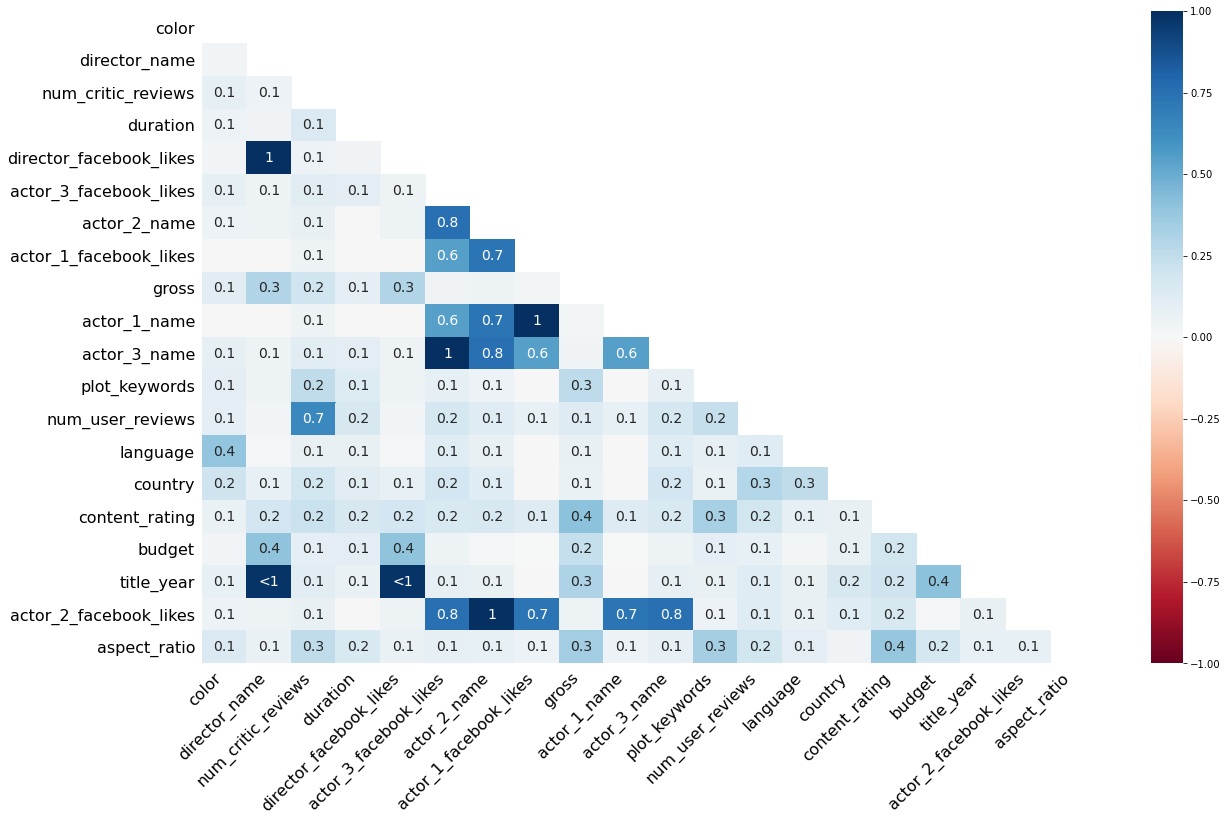

In [7]:
#heatmap of missing values
msno.heatmap(movies)

In [8]:
#removing missing values
movies.dropna(inplace=True)

In [9]:
#resetting the index
movies.reset_index(drop=True, inplace=True)
movies.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [10]:
print('Number of missing values: ', movies.isnull().values.sum())
print('Data lenght: ', len(movies))

Number of missing values:  0
Data lenght:  3761


**Duplicate values**

There are total of 247 duplicated rows.

**Action taken**

Duplicate rows will be removed on the movie_title column.

In [11]:
#removing duplicate rows based on the 'movie_title' column
movies.drop_duplicates(subset=['movie_title'], keep=False, inplace=True)

In [12]:
print('Data length: ', len(movies))

Data length:  3565


In [13]:
#resetting the index
movies.reset_index(drop=True, inplace=True)
movies.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


**Exploring numerical features**

In [14]:
#separating numerical features from the categorical
num_movies = movies.select_dtypes(include=['float64', 'int64'])

CPU times: user 31.5 s, sys: 200 ms, total: 31.7 s
Wall time: 31.7 s


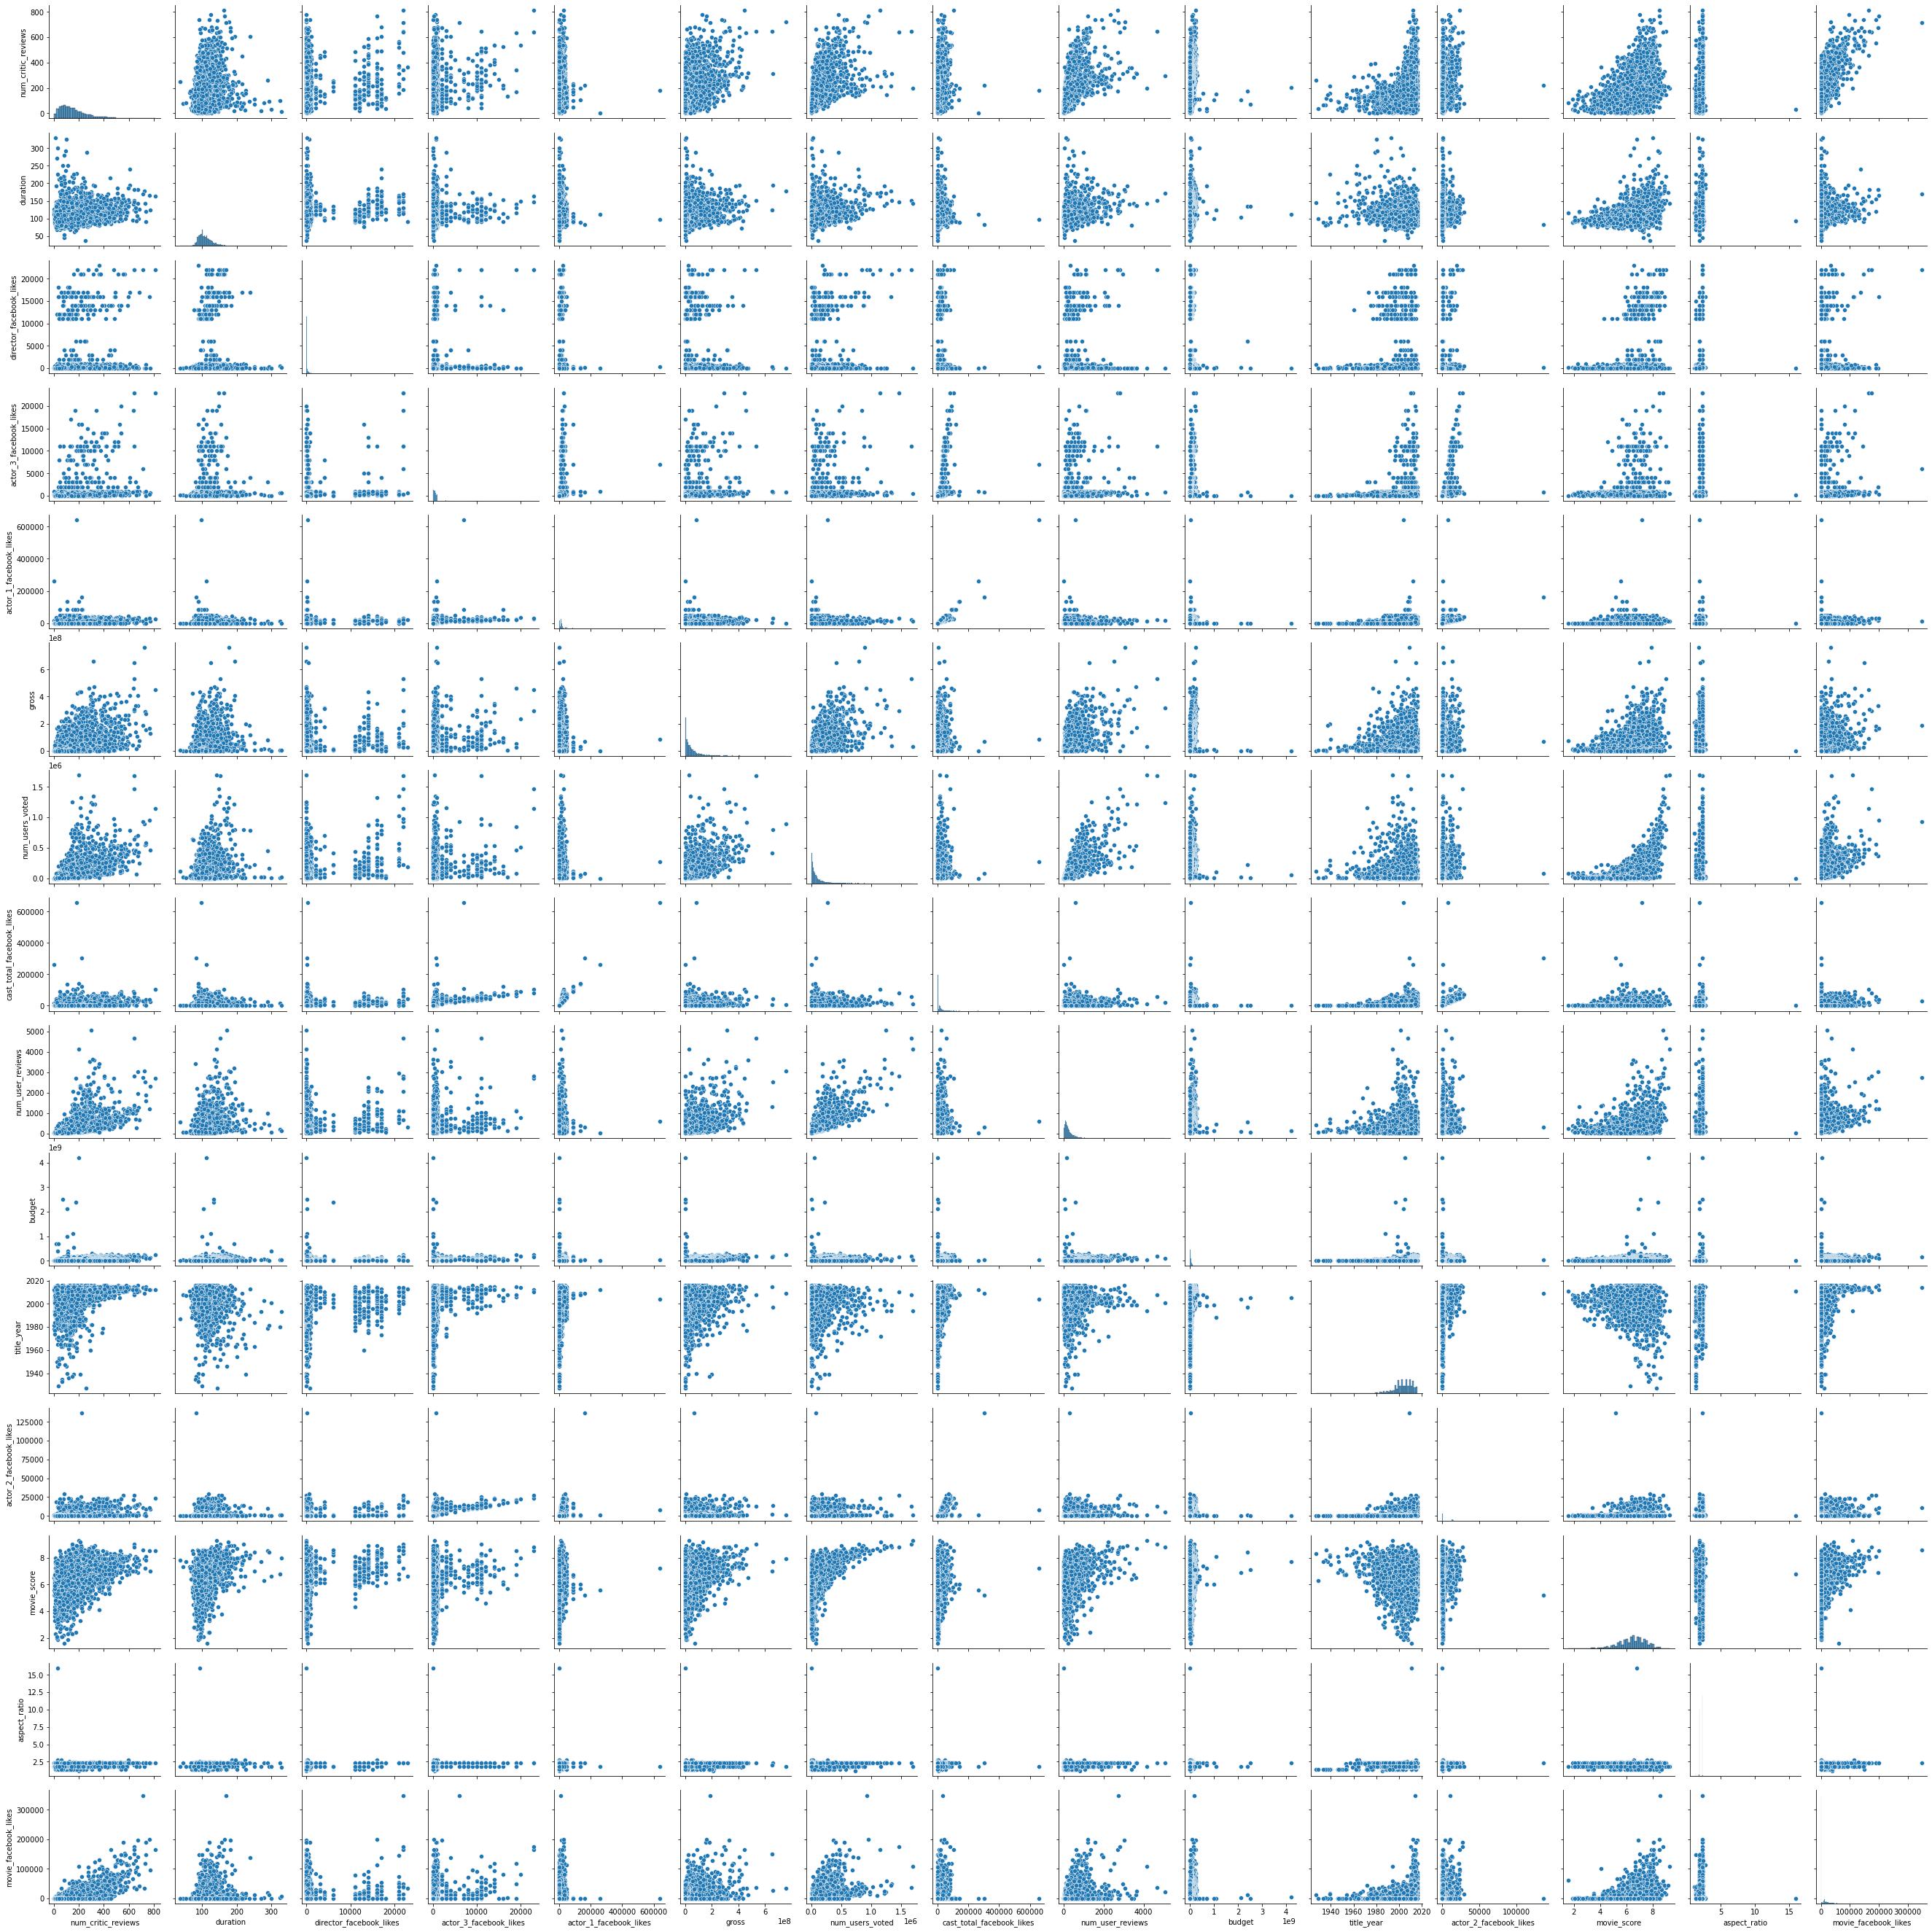

In [15]:
%%time

#visualizing numerical features using pairplot
sns.pairplot(num_movies)

**Converting budget and gross to a more interpretable value expressed in millions**

As gross and budget are both expressed in 6 and more digits, for the sake of interpretability and visualization, we will convert the values to million, and create two new features.

In [16]:
#converting budget to million
movies['budget ($) millions'] = (movies['budget'].astype(float)/1000000).round(2)

#converting gross to million
movies['gross ($) millions'] = (movies['gross'].astype(float)/1000000).round(2)
movies.head(1)

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,237.0,760.51


In [17]:
#converting gross to million
movies['num_voted_mill'] = (movies['num_users_voted'].astype(float)/1000000).round(2)
movies.head(1)

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,237.0,760.51,0.89


**Identifying anomalies**

An obvious outlier in the budget feature was detected, which after further inspection was identified as false.

**Action taken** : The false value was replaced with the appropriate value taken from the IMDB website.

------------------------------------------------------------------------------------------------------------------

Initial exploration identified huge outliers in the budget value, which was identified as a currency from the country of origin. All USA movies appear to have the same curency: US dollar. All non-USA English speaking countries (New Zealand, UK, Australia etc.) appear to have their budgets expressed in US dollars.

**Action taken** : removed all foreign languages, and kept the English language.

<AxesSubplot:xlabel='budget ($) millions', ylabel='Density'>

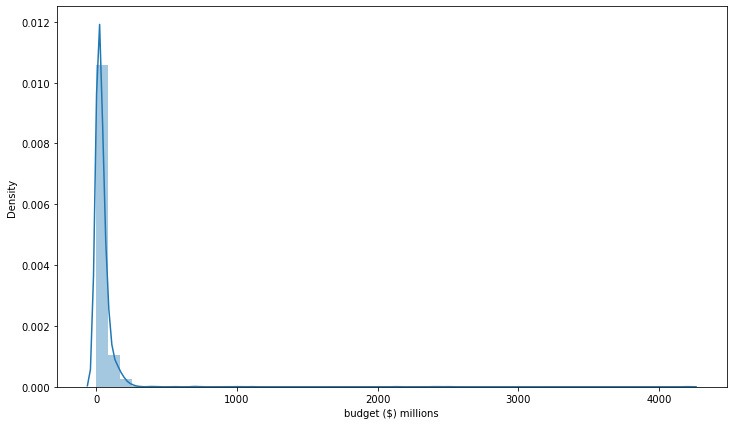

In [18]:
#zooming in on a potential anomaly that was detected in the previous plot concerning the budget feature 
f, ax = plt.subplots(figsize=(12,7))
sns.distplot(movies['budget ($) millions'],ax=ax)

In [19]:
#locating the incorrect value
movies[movies['budget'] == 390000000.0]

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill
915,Color,Luc Besson,111.0,158.0,0.0,15.0,David Bailie,51.0,14131298.0,Adventure|Biography|Drama|History|War,...,R,390000000.0,1999.0,40.0,6.4,2.35,0,390.0,14.13,0.06


In [20]:
#removing the invalid budgetvalue and replacing it with the proper one
movies['budget'] = movies['budget'].replace(390000000.0, 60000000.0)

In [21]:
# updating the budget in millions column
movies['budget ($) millions'] = (movies['budget'].astype(float)/1000000).round(2)

In [22]:
#exploring outliers and identifying if the currency between gross and budget matches
budget_over_250 = movies[movies['budget ($) millions'] > 250]
budget_over_250[['country', 
                 'language',
                 'movie_title', 
                 'budget ($) millions', 
                 'gross ($) millions']].sort_values('budget ($) millions', ascending=False)

,country,language,movie_title,budget ($) millions,gross ($) millions
3109,South Korea,Korean,Lady Vengeance,4200.00,0.21
2566,Hungary,Hungarian,Fateless,2500.00,0.20
2036,Japan,Japanese,Princess Mononoke,2400.00,2.30
2046,Japan,Japanese,Steamboy,2127.52,0.41
2841,Japan,Japanese,Akira,1100.00,0.44
3398,Japan,Japanese,Godzilla 2000,1000.00,10.04
2610,India,Hindi,Kabhi Alvida Naa Kehna,700.00,3.28
3104,Spain,Spanish,Tango,700.00,1.69
1203,China,Mandarin,Red Cliff,553.63,0.63
2771,Thailand,Thai,The Legend of Suriyothai,400.00,0.45


In [23]:
#keeping only the English speaking movies
movies = movies[movies.language == 'English']

In [24]:
#resetting the index
movies.reset_index(drop=True, inplace=True)
movies.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,237.0,760.51,0.89
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,300.0,309.40,0.47
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,245.0,200.07,0.28
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,250.0,448.13,1.14
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,263.7,73.06,0.21


In [25]:
movies['language'].value_counts()

English    3410
Name: language, dtype: int64

**Exploring categorical features**

In [26]:
movies['genres'].value_counts()

Comedy|Drama|Romance                                       138
Comedy                                                     137
Comedy|Drama                                               128
Comedy|Romance                                             127
Drama                                                      121
                                                          ... 
Action|Adventure|Fantasy|Horror                              1
Adventure|Animation|Comedy|Drama|Family|Fantasy|Musical      1
Action|Adventure|Fantasy|Horror|Sci-Fi                       1
Comedy|Family|Romance|Sport                                  1
Comedy|Sci-Fi|Thriller                                       1
Name: genres, Length: 713, dtype: int64

In [27]:
movies['plot_keywords'].value_counts()

actor|detective sergeant|hotel|nightclub|thief                           1
1970s|flashback|love|money|murder                                        1
california|love|marriage|wedding|wedding dress                           1
afterlife|baby boy|bird in a cage|ghost|reunited family                  1
bare chested male|brother|catholic orphanage|long lost siblings|twins    1
                                                                        ..
antarctica|minion|queen|super villain|villain                            1
coma|death|miner|valentine|valentine's day                               1
2000s|golf caddy|golf course|golfer|question mark in title               1
father son relationship|horse|horse ranch|ranch|wild mustang             1
found footage|teenager|time machine|time travel|video footage            1
Name: plot_keywords, Length: 3410, dtype: int64

In [28]:
movies['country'].value_counts()

USA               2822
UK                 290
France              69
Germany             65
Canada              56
Australia           34
Spain               14
New Zealand          8
Ireland              7
Japan                6
Italy                5
Denmark              5
Hong Kong            4
South Africa         3
South Korea          3
Czech Republic       2
China                2
Romania              1
Aruba                1
Belgium              1
Chile                1
Iceland              1
Hungary              1
Poland               1
Russia               1
Thailand             1
Peru                 1
Official site        1
Iran                 1
Georgia              1
Greece               1
New Line             1
Name: country, dtype: int64

In [29]:
movies['color'].value_counts()

Color              3304
Black and White     106
Name: color, dtype: int64

In [30]:
movies['language'].value_counts()

English    3410
Name: language, dtype: int64

In [31]:
movies['content_rating'].value_counts()

R            1534
PG-13        1188
PG            530
G              83
Not Rated      23
Unrated        17
Approved       16
X               7
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

# Feature engineering

**Profit**

For the sake of exploration and clarity, two new features will be added to the dataset: profit and roi.

Profit is calculated by subtracting the production cost (in this case budget) by the total amount earned (gross).

In [32]:
movies['profit'] = movies['gross ($) millions'] - movies['budget ($) millions']

**ROI**

ROI is calculated by subtracting the budget by net profit, and multiplying it by 100. The resulting amount is in %.

In [33]:
movies['roi'] = (movies['profit']/movies['budget ($) millions'] * 100).round(2)

**Profit Margin**

- The profit margin measures what percentage of revenue (in this case gross) a movie keeps after paying for all expenses. The profit margin lets us know how much profit a movie has generated for each dollar of sale. For example, a 40% profit margin means you have a net income of $0.40 for each dollar of sales. It shows the overall ability to turn income into profit.

- Formula for calculating use the profit margin is: Profit Margin = (Profit / Gross) X 100

In [34]:
movies['profit_margin'] = (movies['profit'] / movies['gross ($) millions']).round(2)

**VAR (Value Above Replacement)**

- Value Above Replacement (VAR) represents a value of number of times a figure (actor/actress or a director) has exceeded an average amount. In terms of profit, VAR measures the X times an actor/actress or a director appeared in movies with an above average profit.

- VAR is calculated by taking the number of times an actor/actress or a director appeared in a movie, dividing it by the net profit of movies they appeared in.

- For the sake of this project, we will consider both actors/actresses and directors, with a condition for actor having appeared in at least 5 movies, and directors directing at least 3 movies.

In [35]:
#calculating VAR for actors/actresses

actor1_counts = movies['actor_1_name'].value_counts()

#creating a list with a condition of having appeared in at least 5 movies
actor1_list = actor1_counts[actor1_counts >= 5].index.tolist()

#creating a dataframe with actors in 5 or more movies
actors1 = movies[movies['actor_1_name'].isin(actor1_list)]

#creating a dataframe with actors and the average profit
actor1_total = actors1.groupby(['actor_1_name'], as_index=False)['profit'].mean().sort_values(by='profit', ascending=False)

#creating the VAR value feature
actor1_total['VAR'] = (actor1_total['profit']/actor1_total['profit'].mean())

In [36]:
#calculating VAR for directors

director_counts = movies['director_name'].value_counts()

#creating a list with a condition of having appeared in at least 5 movies
director_list = director_counts[director_counts >= 5].index.tolist()

#creating a dataframe with actors in 5 or more movies
director = movies[movies['director_name'].isin(director_list)]

#creating a dataframe with actors and the average profit
director_total = director.groupby(['director_name'], as_index=False)['profit'].mean().sort_values(by='profit', ascending=False)

#creating the VAR value feature
director_total['VAR'] = (director_total['profit']/director_total['profit'].mean())

**Removing irrelevant features**

- *Color* - there is no evidence this feature has any relevance to the target feature.
- *Aspect Ratio* - there is no evidence this feature has any relevance to the target feature.
- *Actor 3* - I assume additional cast doesn't have any relevance for future recommendations, so I kept the main two actors, and removed the third one.
- *Actor 3 Facebook Likes* - the reasoning for the removal of this feature matches the one described for removing *Actor 3*

In [37]:
#removing irrelevant features
movies.drop(columns=['color', 'aspect_ratio', 'actor_3_name', 'actor_3_facebook_likes'], inplace=True)

In [38]:
#resetting the index
movies.reset_index(drop=True, inplace=True)
movies.head()

,director_name,num_critic_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill,profit,roi,profit_margin
0,James Cameron,723.0,178.0,0.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,2009.0,936.0,7.9,33000,237.0,760.51,0.89,523.51,220.89,0.69
1,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,2007.0,5000.0,7.1,0,300.0,309.40,0.47,9.40,3.13,0.03
2,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,2015.0,393.0,6.8,85000,245.0,200.07,0.28,-44.93,-18.34,-0.22
3,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,2012.0,23000.0,8.5,164000,250.0,448.13,1.14,198.13,79.25,0.44
4,Andrew Stanton,462.0,132.0,475.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,...,2012.0,632.0,6.6,24000,263.7,73.06,0.21,-190.64,-72.29,-2.61


# **Exploratory Data Analysis**

Questions:

- What is the correlation between budget and profit? What would be an optimal budget value for making a Box Office success?
- Do actors/actresses and directors play a role in a movie's success?
- How does a movie's rating impact profit?
- Is duration of the movie relevant to profit?
- How do genres play in with profit and profit margin?
- How does the trend of profit, revenue, profit margin, and other attributes change over years?
- How do number of users voted, and number of critical reviews impact profit?
- Is there a pattern in common plot keywords with successful movies?

# ** FUN VISUALIZATIONS**

- 4 plots showing top 10 movies with the highest PROFIT, GROSS, BUDGET, ROI

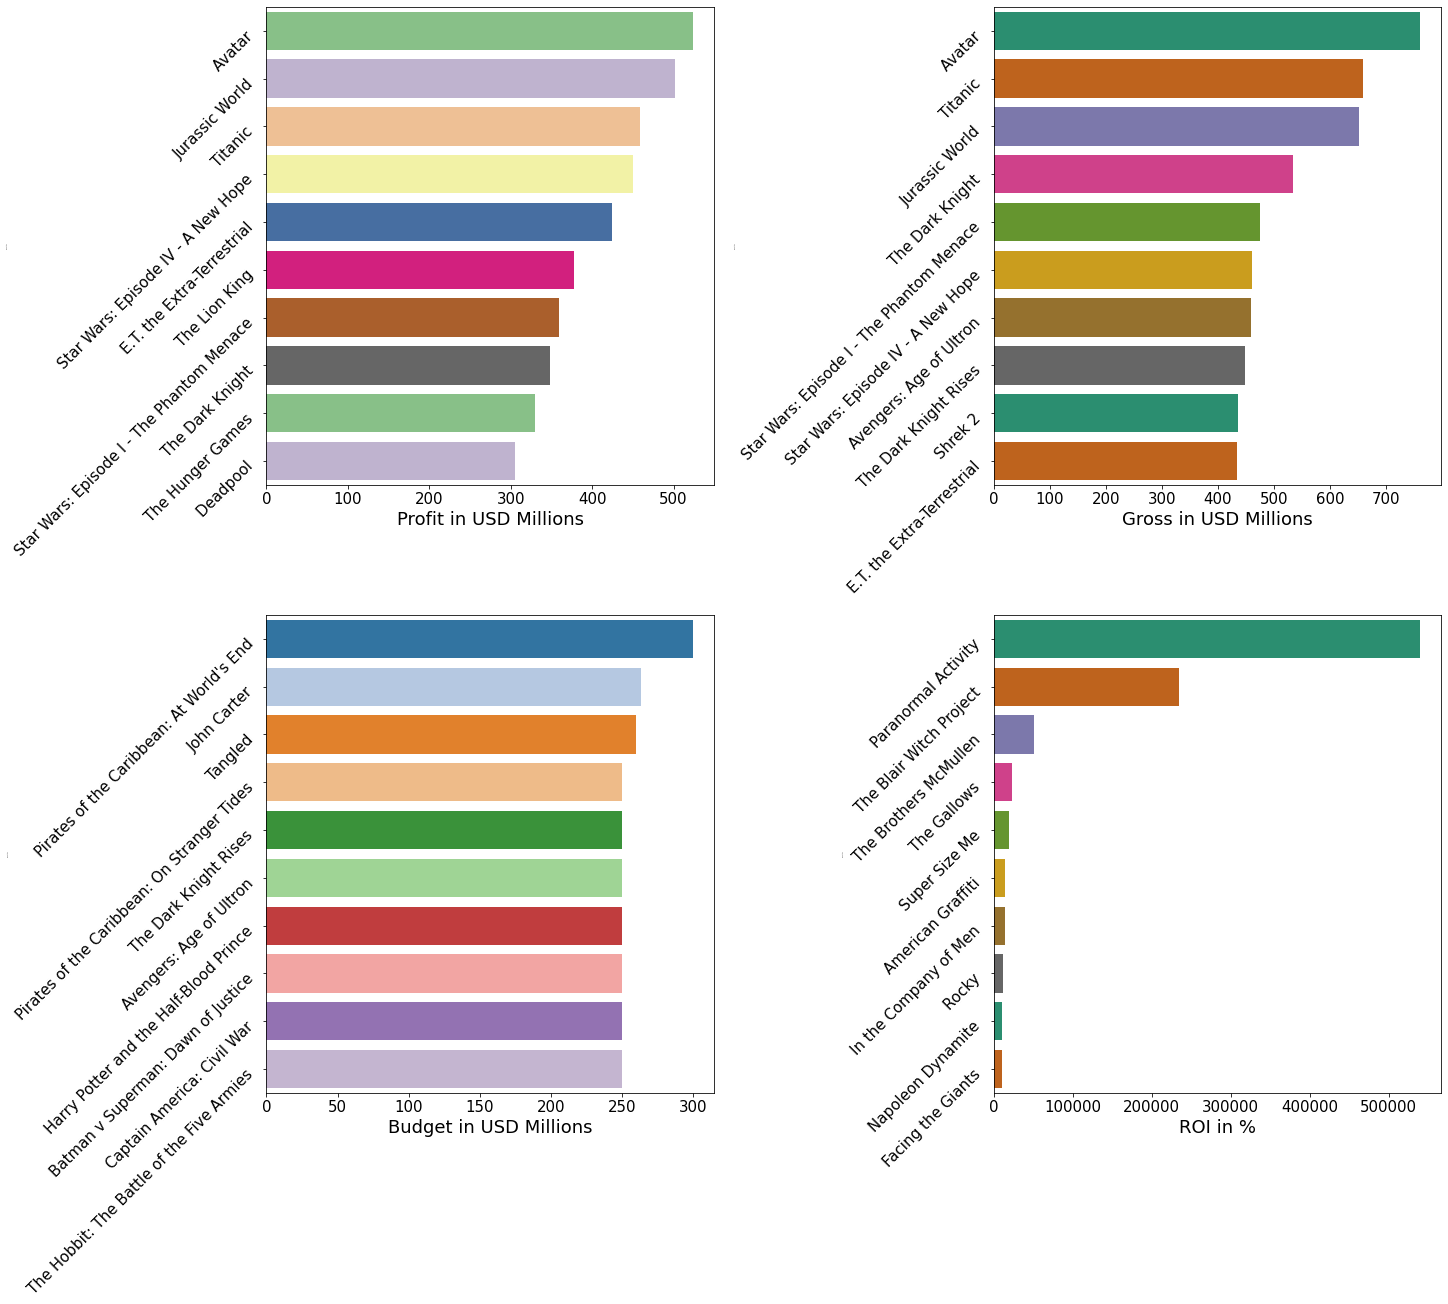

In [39]:
#creating dataframes
top_10_profit = movies[['movie_title', 'profit']].sort_values(by = 'profit', ascending = False)[:10]
top_10_gross = movies[['movie_title', 'gross ($) millions']].sort_values(by='gross ($) millions',ascending=False)[:10]
top_10_budget = movies[['movie_title', 'budget ($) millions']].sort_values(by = 'budget ($) millions', ascending = False)[:10]
top_10_roi = movies[['movie_title', 'roi']].sort_values(by = 'roi', ascending = False)[:12]

#visualizing top 10 grossing, profitable, highest budget, highest roi movies

plt.rc('ytick', labelsize = 15) 
plt.rc('xtick', labelsize = 15)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2,nrows = 2,figsize = (20, 18), constrained_layout = True)

sns.barplot(data = top_10_profit, x = 'profit', y = 'movie_title', palette = 'Accent', ax = ax1)
ax1.tick_params(axis= 'y', labelrotation = 45)
ax1.set_xlabel('Profit in USD Millions',fontsize = 18)
ax1.set_ylabel('movie title', fontsize = 1)

sns.barplot(data = top_10_gross, x = 'gross ($) millions', y = 'movie_title', palette = 'Dark2', ax = ax2)
ax2.tick_params(axis= 'y', labelrotation = 45)
ax2.set_xlabel('Gross in USD Millions',fontsize = 18)
ax2.set_ylabel('movie title', fontsize = 1)

sns.barplot(data = top_10_budget, x = 'budget ($) millions', y = 'movie_title', palette = 'tab20', ax = ax3)
ax3.tick_params(axis= 'y', labelrotation = 45)
ax3.set_xlabel('Budget in USD Millions',fontsize = 18)
ax3.set_ylabel('movie title', fontsize = 1)

sns.barplot(data = top_10_roi[-10:], x = 'roi', y = 'movie_title', palette = 'Dark2', ax = ax4)
ax4.tick_params(axis= 'y', labelrotation = 45)
ax4.set_xlabel('ROI in %',fontsize = 18);
ax4.set_ylabel('movie title', fontsize = 1);

# **What is the correlation between budget and profit? Which budget ranges should be considered for making a Box Office success?**

In order to answer this question we will need to examine several key things:

- What is the relationship between profit (profit margin) and budget?

Budget and profit show a clear positively linear relationship, which means that the higher the budget, the higher the profit of a movie.

The trend line in this plot of profit margin and budget is showing a negative trend, which can be explained by if we spend too much money on making a movie we can potentially descrease our profit margin.

- What is the average and median value of budget for the top 30 movies? and of total?
- What is the average and median value of profit margin for the top 30 movies? and of total?

Both averages and median values differ, so in order to adjust for obvious outliers such as Avatar, Jurassic World, and Titanic, we will consider the median values. 

**Conclusion**: The optimal budget value for making a successfull movie should not be less than 40 Million US dollars, and on average we recommend it to be somewhere around 75 Million US dollars. This recommendation was made based on a profit margin greater than 0.6. There is evidence that higher budget movies risk a smaller profit margin, as shown in the plot, therefore we cannot recommend very large budgets to be a certain indicator of a Box Office success.

**What is the relationship between profit (profit margin) and budget?**

- in order to analyse this relatonship we need to create a new dataframe containing movies with profit greater than 0

In [40]:
#creating a dataframe with profit > 0
movies_profitable = movies.loc[movies['profit'] > 0]
movies_profitable_sorted = movies_profitable.sort_values(by = 'profit', ascending = False)
movies_profitable_sorted.reset_index(inplace = True)
movies_profitable_sorted.head()

,index,director_name,num_critic_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill,profit,roi,profit_margin
0,0,James Cameron,723.0,178.0,0.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,2009.0,936.0,7.9,33000,237.0,760.51,0.89,523.51,220.89,0.69
1,25,Colin Trevorrow,644.0,124.0,365.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,...,2015.0,2000.0,7.0,150000,150.0,652.18,0.42,502.18,334.79,0.77
2,22,James Cameron,315.0,194.0,0.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,...,1997.0,14000.0,7.7,26000,200.0,658.67,0.79,458.67,229.33,0.70
3,2514,George Lucas,282.0,125.0,0.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,...,1977.0,1000.0,8.7,33000,11.0,460.94,0.91,449.94,4090.36,0.98
4,2555,Steven Spielberg,215.0,120.0,14000.0,Dee Wallace,861.0,434949459.0,Family|Sci-Fi,Henry Thomas,...,1982.0,725.0,7.9,34000,10.5,434.95,0.28,424.45,4042.38,0.98


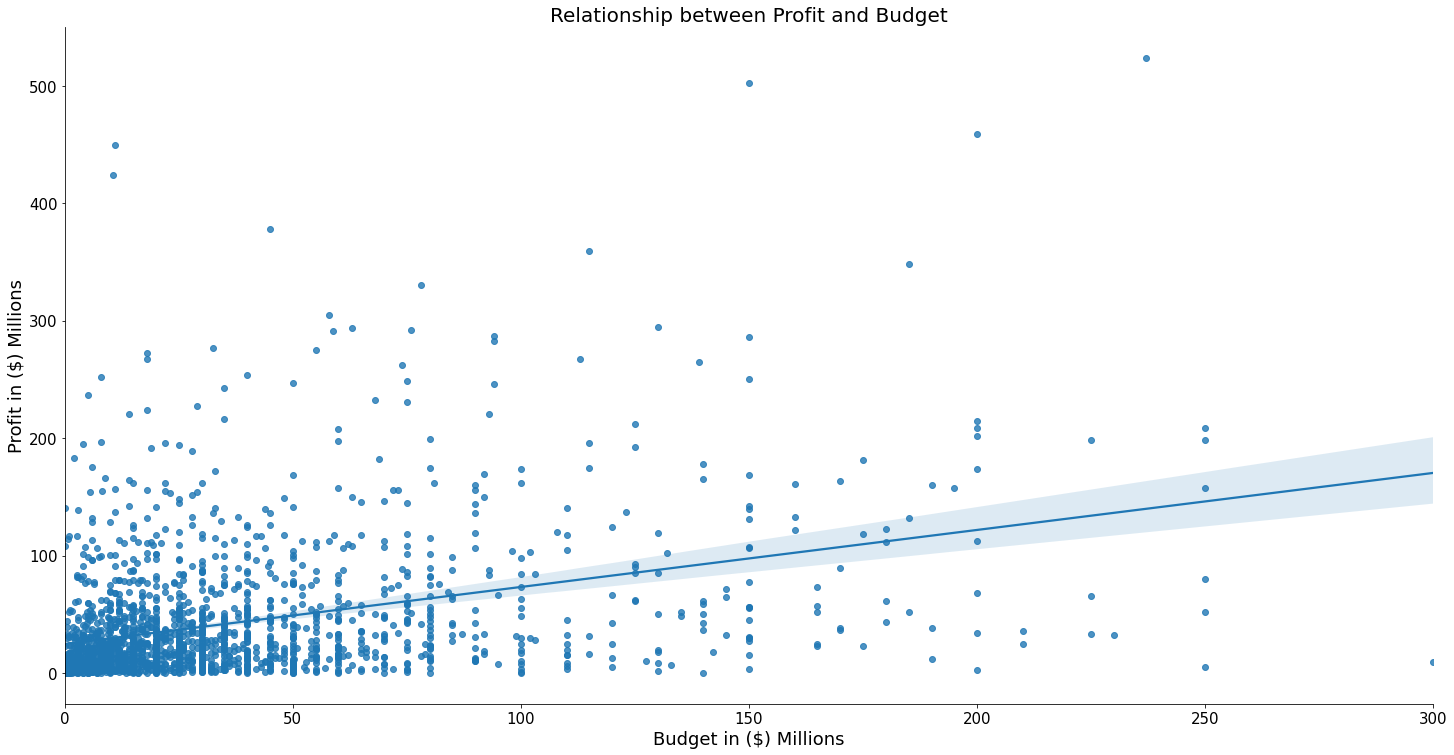

In [41]:
#visualizing the trend between profit vs budget

sns.lmplot(x = 'budget ($) millions', y = 'profit', data = movies_profitable_sorted, height = 10, aspect = 2)
plt.ylabel('Profit in ($) Millions', fontsize = 18)
plt.xlabel('Budget in ($) Millions', fontsize = 18)
plt.title('Relationship between Profit and Budget', fontsize = 20)
# plt.xticks(rotation = 'vertical')
plt.show();

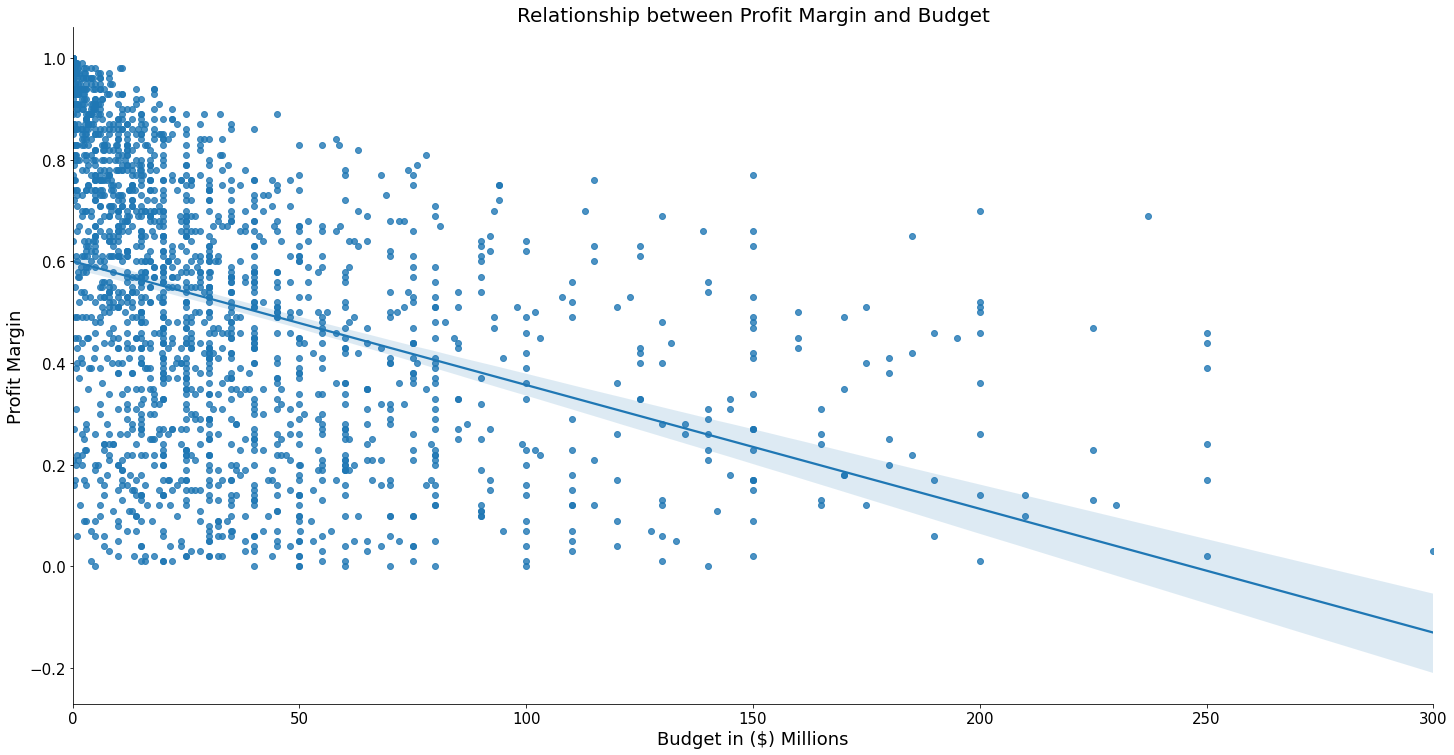

In [42]:
#visualizing the trend between profit margin vs budget

sns.lmplot(x = 'budget ($) millions', y = 'profit_margin', data = movies_profitable_sorted, height = 10, aspect = 2)
plt.ylabel('Profit Margin', fontsize = 18)
plt.xlabel('Budget in ($) Millions', fontsize = 18)
plt.title('Relationship between Profit Margin and Budget', fontsize = 20)
# plt.xticks(rotation = 'vertical')
plt.show();

**What is the average and median value of budget for the top 30 movies? and of total?**

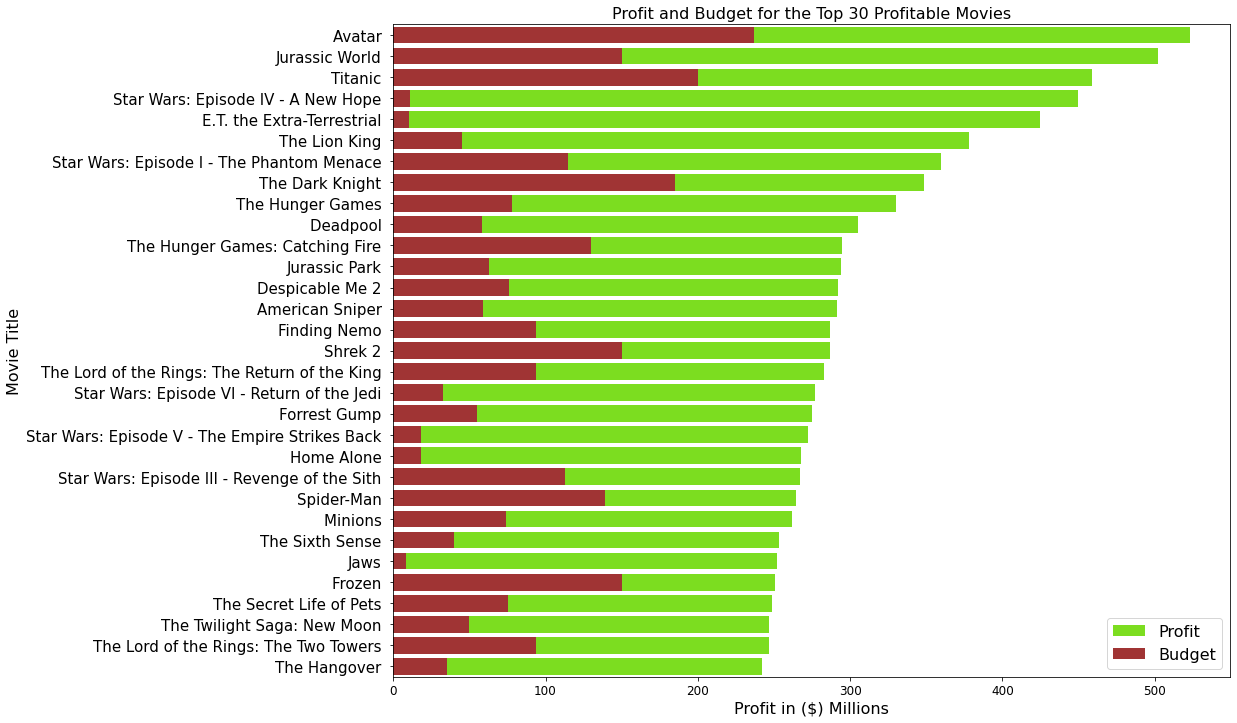

In [43]:
plt.figure(figsize=(15,12))

sns.barplot(x = movies_profitable_sorted.loc[0:30, 'profit'],
            y = movies_profitable_sorted.loc[0:30, 'movie_title'], 
            color = 'lawngreen', 
            label = 'Profit', 
            ci = None)

sns.barplot(x = movies_profitable_sorted.loc[0:30, 'budget ($) millions'],
            y = movies_profitable_sorted.loc[0:30, 'movie_title'], 
            color = 'firebrick', 
            label = 'Budget', 
            ci = None)

plt.xlabel('Profit in ($) Millions', fontsize = 16)
plt.title('Profit and Budget for the Top 30 Profitable Movies', fontsize = 16)
plt.ylabel('Movie Title', fontsize = 16)
plt.xticks(rotation='horizontal', fontsize = 12)
plt.legend(fontsize = 16);

In [44]:
print('Average Budget value of the Top 30 successful Movies - ', 
      round(movies_profitable_sorted.loc[0:29, 'budget ($) millions'].mean(), 2))
print('Median Budget value of the Top 30 successful Movies - ', 
      movies_profitable_sorted.loc[0:29, 'budget ($) millions'].median())
print('Average Budget value of all movies with Profit greater than 0 - ', 
      round(movies_profitable_sorted['budget ($) millions'].mean(), 2))
print('Median Budget value of all movies with Profit greater than 0 - ', 
      movies_profitable_sorted['budget ($) millions'].median())

Average Budget value of the Top 30 successful Movies -  87.39
Median Budget value of the Top 30 successful Movies -  75.5
Average Budget value of all movies with Profit greater than 0 -  36.26
Median Budget value of all movies with Profit greater than 0 -  23.0


**What is the average and median value of profit margin for the top 30 movies? and of total?**

In [45]:
print('Average Profit Margin of the Top 30 successful Movies - ', 
      round(movies_profitable_sorted.loc[0:29, 'profit_margin'].mean(), 2))
print('Median Profit Margin of the Top 30 successful Movies - ', 
      round(movies_profitable_sorted.loc[0:29, 'profit_margin'].median(), 2))
print('Average Profit Margin of all movies with Profit greater than 0 - ', 
      round(movies_profitable_sorted['profit_margin'].mean(), 2))
print('Median Profit Margin of all movies with Profit greater than 0 - ', 
      movies_profitable_sorted['profit_margin'].median())

Average Profit Margin of the Top 30 successful Movies -  0.8
Median Profit Margin of the Top 30 successful Movies -  0.79
Average Profit Margin of all movies with Profit greater than 0 -  0.51
Median Profit Margin of all movies with Profit greater than 0 -  0.52


In [46]:
#filtering out movies with profit margin > 0.6, top 30, median budget

margin_filter = movies[(movies['profit_margin'] > 0.6) & (movies['budget ($) millions'] > 23)]
margin_filter[['movie_title','profit_margin','budget ($) millions','profit']].describe()

,profit_margin,budget ($) millions,profit
count,193.000000,193.000000,193.000000
mean,0.711295,50.979793,133.052021
std,0.072936,33.887414,86.950432
min,0.610000,23.600000,41.180000
25%,0.660000,30.000000,75.240000
50%,0.690000,40.000000,107.590000
75%,0.760000,60.000000,160.150000
max,0.890000,237.000000,523.510000


# **Do actors/actresses and directors play a role in a movie's success?**

We will be working with actor1_total dataframe and director_total dataframe.

- It appears that movies where Robert Pattison stars, make almost 9 times the amount of the average movie. 
- Directors play a significant role, movies directed by George Lucas make little over 12 times the amount of the average movie. 
- Average mean VAR of actor/actress -  3.51
- Average mean VAR of directors -  3.36
- Average median VAR of actor/actress -  3.03
- Average median VAR of directors -  2.53

**Conclusion**: With great certainty we can recommend that the studio takes in to account the VAR score of a actor/actress, and even more the VAR score of the person who will direct the movie. 

- For actors/actresses we recommend a minimum VAR value between 1.0 and 3.0
- For directors we recommend a minimum VAR value between 1.0 and 2.53

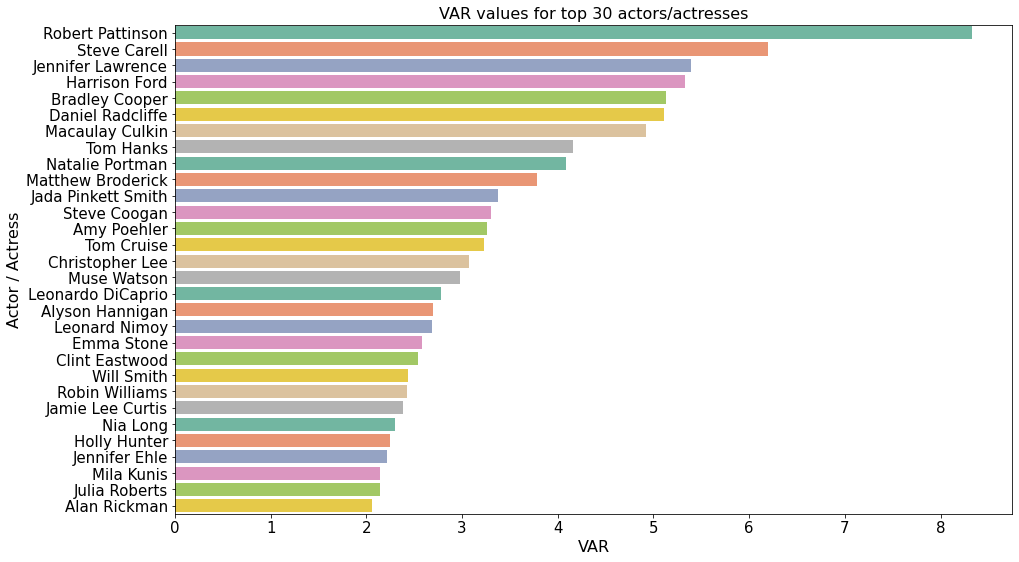

In [47]:
#visualizing top 30 actors / actresses and their VAR value

plt.figure(figsize=(15,9))

actor1_top30 = actor1_total[:30]

sns.barplot(x = 'VAR',
            y = 'actor_1_name',
            data = actor1_top30,
            palette = 'Set2')

plt.title('VAR values for top 30 actors/actresses', fontsize = 16)
plt.xlabel('VAR', fontsize = 16)
plt.ylabel('Actor / Actress', fontsize = 16);

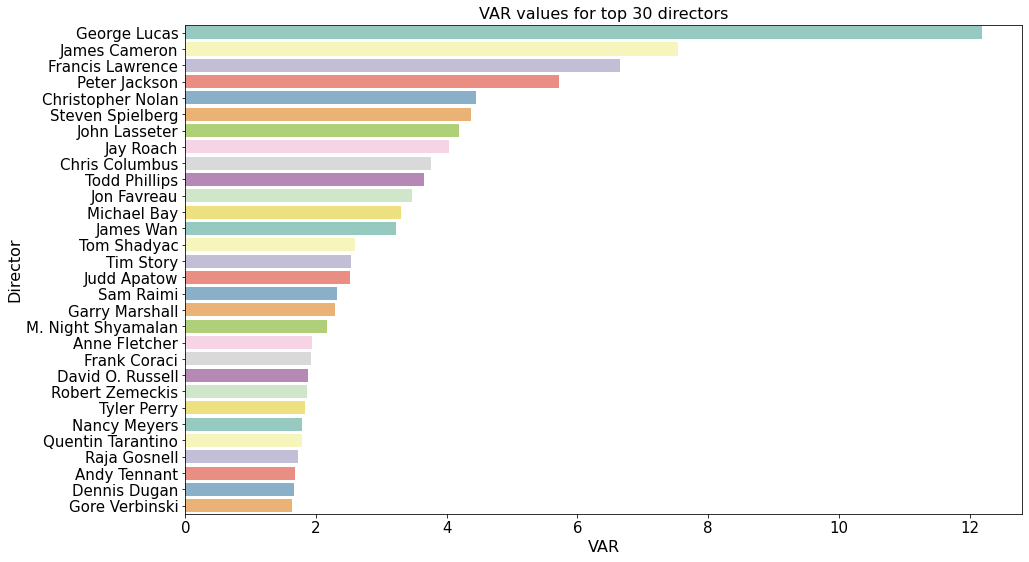

In [48]:
#visualizing top 30 directors and their VAR value

plt.figure(figsize=(15,9))

director_top30 = director_total[:30]

sns.barplot(x = 'VAR',
            y = 'director_name',
            data = director_top30,
            palette = 'Set3')

plt.title('VAR values for top 30 directors', fontsize = 16)
plt.xlabel('VAR', fontsize = 16)
plt.ylabel('Director', fontsize = 16);

In [49]:
print('Average mean VAR of actor/actress - ', round(actor1_top30['VAR'].mean(), 2))
print('Average mean VAR of directors - ', round(director_top30['VAR'].mean(), 2))

print('Average median VAR of actor/actress - ', round(actor1_top30['VAR'].median(), 2))
print('Average median VAR of directors - ', round(director_top30['VAR'].median(), 2))

Average mean VAR of actor/actress -  3.51
Average mean VAR of directors -  3.36
Average median VAR of actor/actress -  3.03
Average median VAR of directors -  2.53


# **How does a movie's score impact profit?**

- What is the distribution of ratings?

Normally distributed, slightly skewed to the right. Mean value is 6.42, and the median value is 6.5.

- Are ratings correlated with profit? 

Correlation with profit is positive but insignificant: 0.28, and correlation with profit_margin is close to zero: 0.03.

- What is the mean and median value of profit and profit margin for movies with ratings greater than 7?

We filtered out movies with profit greater than 0, and profit margin greater than 0.

- checking for an average IMDB rating director with at least 3 movies

**Conclusion:** We recommend taking into account the average movie score (not less than 7.0) of a director, when hiring one. We consider it will have a positive impact on profit. Another recommendation regarding movie scores will be in relation to movie's genre, and will be detailed later in the report.


In [50]:
movies['movie_score'].describe()

count    3410.000000
mean        6.422375
std         1.052963
min         1.600000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: movie_score, dtype: float64

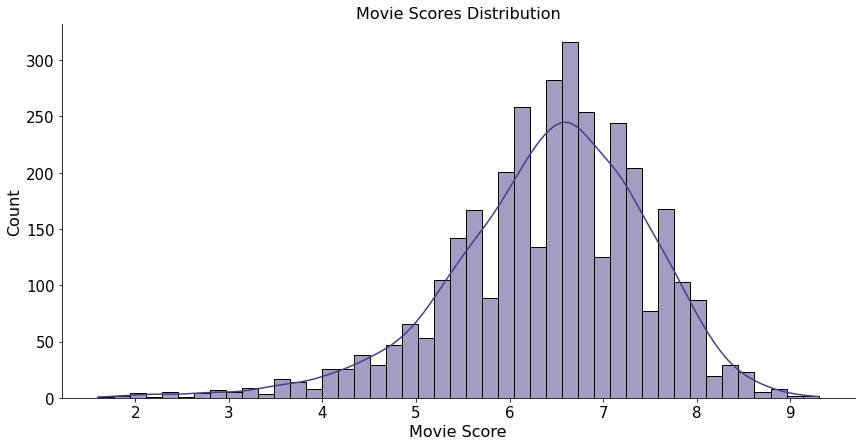

In [51]:
#visualizing the distribution of movie's scores

sns.displot(movies['movie_score'], kde = True, height = 6, aspect = 2, color = 'darkslateblue')
plt.title('Movie Scores Distribution', fontsize = 16)
plt.xlabel('Movie Score', fontsize = 16)
plt.ylabel('Count', fontsize = 16);

In [52]:
sns.__version__

'0.11.1'

In [53]:
#showing correlation between movie score and profit

score_profit= movies[['movie_score', 'profit', 'profit_margin']]
score_profit_corr = score_profit.corr()
score_profit_corr

,movie_score,profit,profit_margin
movie_score,1.000000,0.281146,0.030936
profit,0.281146,1.000000,0.090494
profit_margin,0.030936,0.090494,1.000000


**What is the mean and median value of profit and profit margin for movies with ratings greater than 7?**

In [54]:
score_7plus = movies[(movies['movie_score'] >= 7) & (movies['profit'] >= 0) & (movies['profit_margin'] >= 0)]

In [55]:
score_7plus.describe()

,num_critic_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_users_voted,cast_total_facebook_likes,num_user_reviews,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,num_voted_mill,profit,roi,profit_margin
count,762.000000,762.000000,762.000000,762.000000,7.620000e+02,7.620000e+02,762.000000,762.000000,7.620000e+02,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000,762.000000
mean,236.346457,119.740157,1764.196850,10209.679790,9.640037e+07,2.434009e+05,15243.391076,584.480315,4.031403e+07,2000.181102,2806.253281,7.562073,21250.749344,40.314016,96.400446,0.243425,56.086430,inf,0.565512
std,156.004349,26.582096,4727.480935,24997.053811,1.018906e+08,2.431734e+05,28434.282376,577.816607,5.036026e+07,13.055980,5037.976750,0.438870,35271.408852,50.360281,101.890691,0.243209,71.605053,NaN,0.263518
min,11.000000,37.000000,0.000000,0.000000,1.105360e+05,5.860000e+02,0.000000,9.000000,2.180000e+02,1933.000000,0.000000,7.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000,0.000000
25%,121.000000,101.000000,6.000000,826.500000,2.600384e+07,7.268000e+04,2159.750000,234.250000,7.625000e+06,1995.000000,427.000000,7.200000,0.000000,7.625000,26.002500,0.070000,10.640000,60.270,0.380000
50%,197.000000,116.000000,122.500000,7000.000000,6.119201e+07,1.724170e+05,9152.000000,415.500000,2.200000e+07,2003.000000,749.500000,7.500000,10000.000000,22.000000,61.190000,0.170000,31.075000,149.430,0.600000
75%,312.250000,132.000000,455.250000,15000.000000,1.279030e+08,3.243415e+05,20455.500000,717.000000,5.000000e+07,2010.000000,1000.000000,7.800000,26000.000000,50.000000,127.905000,0.320000,74.055000,367.085,0.787500
max,813.000000,289.000000,22000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,5060.000000,3.000000e+08,2016.000000,27000.000000,9.300000,349000.000000,300.000000,760.510000,1.690000,523.510000,inf,1.000000


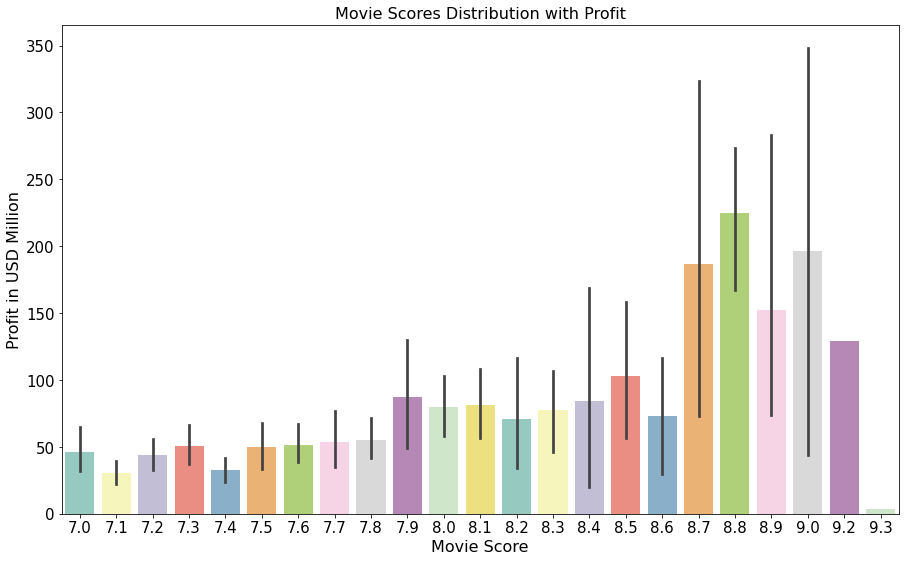

In [56]:
#visualizing average profit and upper/lower values and movie score trends

plt.figure(figsize=(15,9))
sns.barplot(data = score_7plus, x = 'movie_score', y = 'profit', palette = 'Set3')
plt.title('Movie Scores Distribution with Profit', fontsize = 16)
plt.xlabel('Movie Score', fontsize = 16)
plt.ylabel('Profit in USD Million', fontsize = 16);

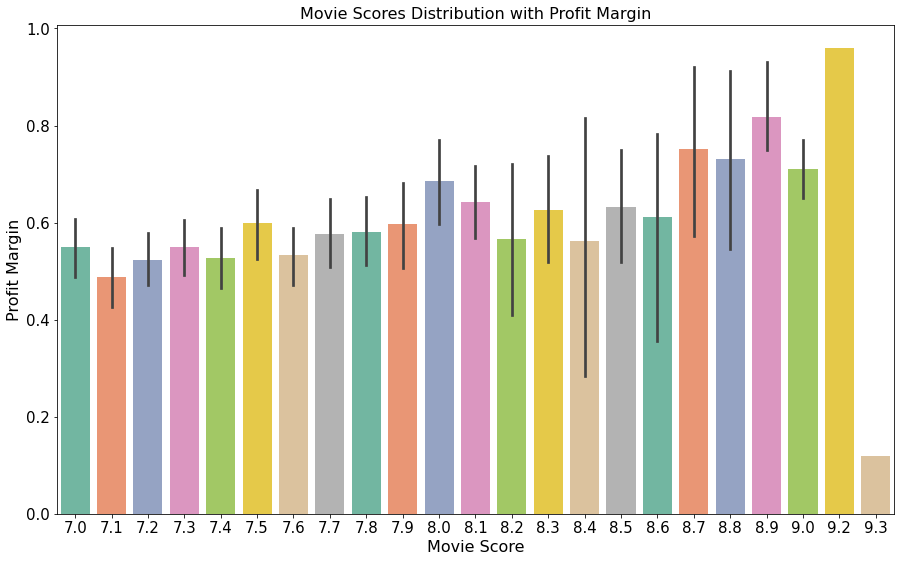

In [57]:
#visualizing average profit margin and upper/lower values and movie score trends

plt.figure(figsize=(15,9))
sns.barplot(data = score_7plus, x = 'movie_score', y = 'profit_margin', palette = 'Set2')
plt.title('Movie Scores Distribution with Profit Margin', fontsize = 16)
plt.xlabel('Movie Score', fontsize = 16)
plt.ylabel('Profit Margin', fontsize = 16);

In [58]:
#checking for an average IMDB rating director with at least 5 movies
director_rating = director.groupby('director_name')['movie_score'].mean().reset_index().sort_values(by = 'movie_score', ascending = False)

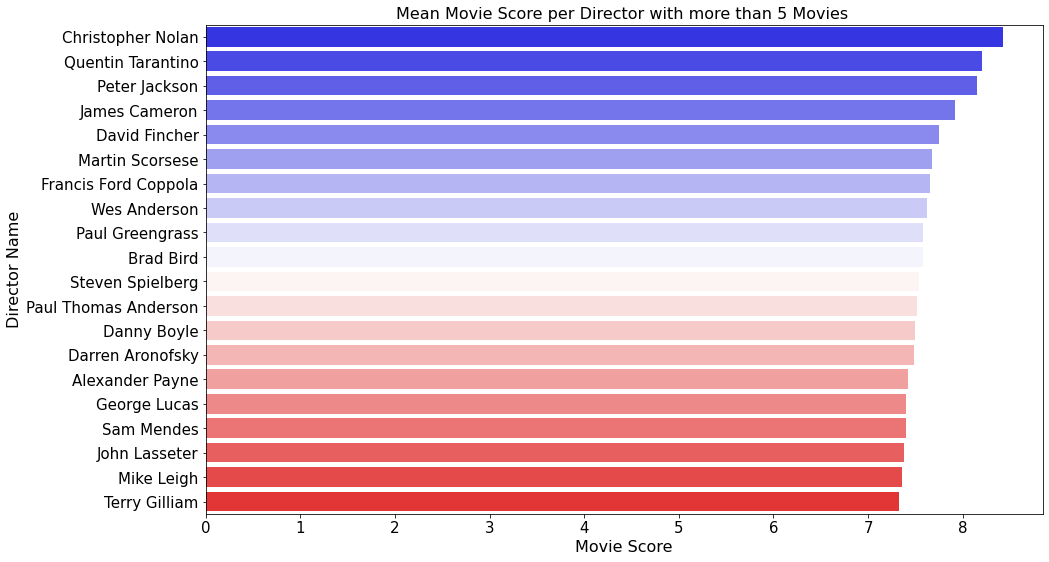

In [59]:
plt.figure(figsize=(15,9))
sns.barplot(data = director_rating[:20], x = 'movie_score', y = 'director_name', palette = 'bwr')
plt.title('Mean Movie Score per Director with more than 5 Movies ', fontsize = 16)
plt.xlabel('Movie Score', fontsize = 16)
plt.ylabel('Director Name', fontsize = 16);

# **How does the trend of profit, revenue, profit margin, and other attributes change over years?**

In [60]:
movies['title_year'].describe()

count    3410.000000
mean     2002.815249
std         9.831935
min      1929.000000
25%      1999.000000
50%      2004.000000
75%      2010.000000
max      2016.000000
Name: title_year, dtype: float64

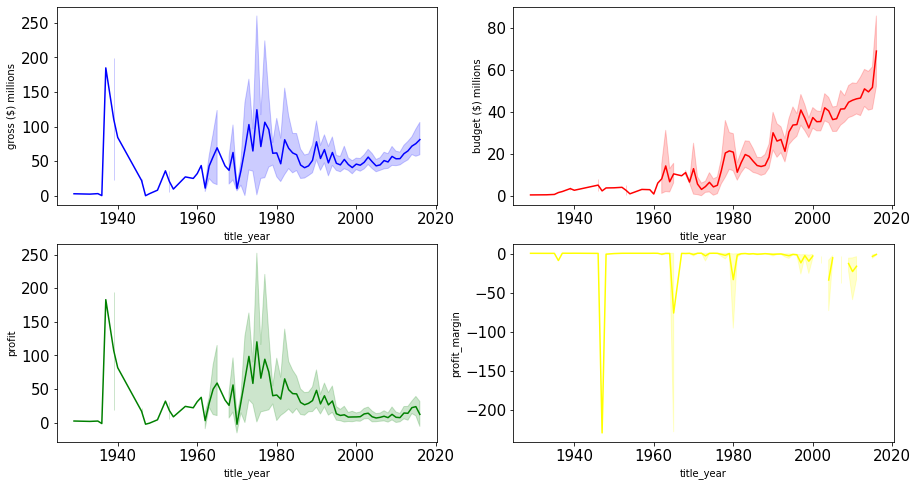

In [61]:
#visualizing budget, gross, profit and profit margin over time

fig,ax =  plt.subplots(2, 2,figsize = (15, 8))
sns.lineplot(x = "title_year", y = 'gross ($) millions', color = 'blue', data = movies, ax = ax[0][0])
sns.lineplot(x = "title_year", y = 'budget ($) millions', color = 'red', data = movies,ax = ax[0][1])
sns.lineplot(x = "title_year", y = 'profit', color = 'green', data = movies,ax = ax[1][0])
sns.lineplot(x = "title_year", y = 'profit_margin', color = 'yellow', data = movies, ax = ax[1][1]);

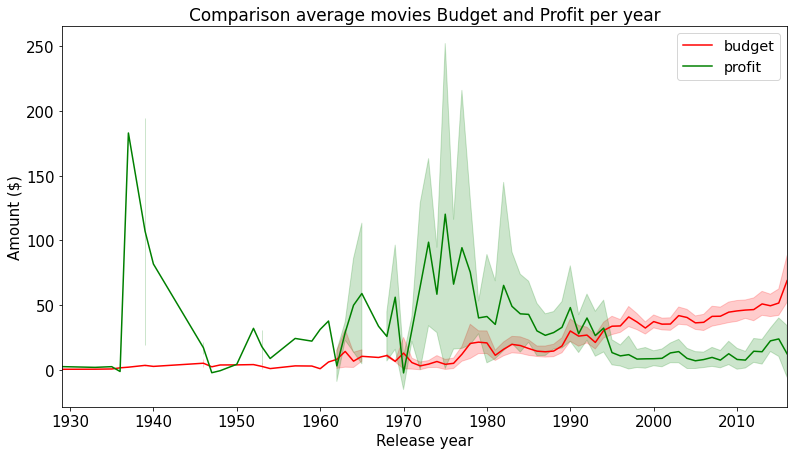

In [62]:
#visualizing budget and profit per year
plt.figure(figsize=(13,7))
lineplot_budget = sns.lineplot(data = movies, x = 'title_year', y = 'budget ($) millions', color = 'red', label = 'budget')
lineplot_profit = sns.lineplot(data = movies, x = 'title_year', y = 'profit', color = 'green', label = 'profit')
plt.xlabel("Release year",fontsize = 15)
plt.ylabel("Amount ($)",fontsize = 15)
plt.title("Comparison average movies Budget and Profit per year",fontsize = 17)
plt.legend(fontsize = 'x-large')
plt.xlim([1929, 2016])
plt.show();

something happened just before 1940's  let's see what had happened:

It appears that there were 3 movies at the time with a huge revenue:

- Snow White and the Seven Dwarfs 184.93
- Gone with the Wind 198.66
- Pinocchio 84.30

In [63]:
year_40s_anomaly = movies[(movies['title_year'] <= 1950) & (movies['title_year'] >= 1930)]

year_40s_anomaly[['movie_title', 
             'title_year', 
             'gross ($) millions', 
             'budget ($) millions', 
             'profit', 
             'profit_margin',
             'roi']].sort_values(by = 'title_year', ascending = False)

,movie_title,title_year,gross ($) millions,budget ($) millions,profit,profit_margin,roi
3062,Annie Get Your Gun,1950.0,8.00,3.77,4.23,0.53,112.20
3064,The Pirate,1948.0,2.96,3.70,-0.74,-0.25,-20.00
3194,The Lady from Shanghai,1947.0,0.01,2.30,-2.29,-229.00,-99.57
2876,Duel in the Sun,1946.0,20.40,8.00,12.40,0.61,155.00
3163,The Best Years of Our Lives,1946.0,23.65,2.10,21.55,0.91,1026.19
1018,Pinocchio,1940.0,84.30,2.60,81.70,0.97,3142.31
3059,Gone with the Wind,1939.0,198.66,3.98,194.68,0.98,4891.46
3131,The Wizard of Oz,1939.0,22.20,2.80,19.40,0.87,692.86
3230,Snow White and the Seven Dwarfs,1937.0,184.93,2.00,182.93,0.99,9146.50
3224,Modern Times,1936.0,0.16,1.50,-1.34,-8.38,-89.33


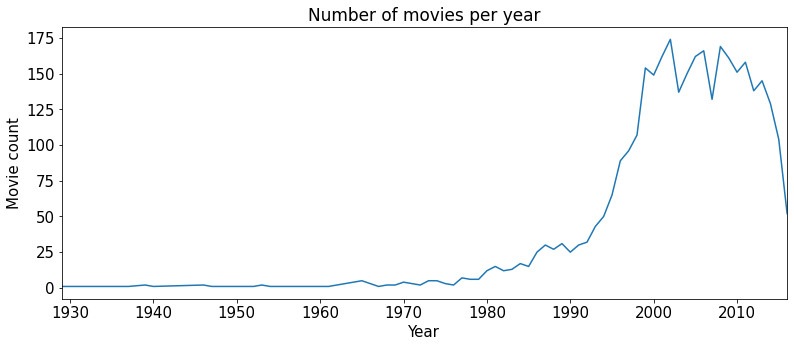

In [64]:
#just for fun, let's see the number of movies released per year
movie_count_per_year = movies.groupby('title_year')['movie_title'].count()
movie_count_per_year.plot(figsize = (13,5))
plt.title('Number of movies per year', fontsize = 17)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Movie count', fontsize = 15)
plt.xlim([1929, 2016])
plt.show();

<AxesSubplot:xlabel='title_year', ylabel='num_voted_mill'>

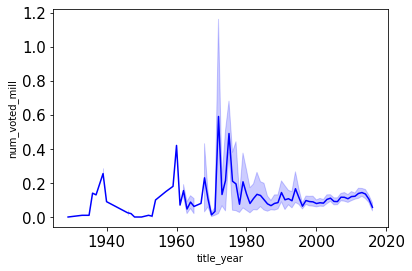

In [65]:
sns.lineplot(x = "title_year", y = 'num_voted_mill', color = 'blue', data = movies)

# **How do genres play in with profit and profit margin?**

- Comedy, Action, Drama, and Adventure are the most common genre in the dataset.
- EXCLUDING GENRES that count less than 40 movies
- **Conclusion:** We recommend investing in the Animation genre, in the above mentioned budget range of 40 Million US Dollars to 75 Million US Dollars, as well as Family and Adventure genres, as they show a desirable ROI, and are not as expensive. They can be on the lower end of the budget recommendations.

In [66]:
movies['genres']

0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
4               Action|Adventure|Sci-Fi
                     ...               
3405                       Comedy|Drama
3406                       Comedy|Drama
3407                Comedy|Crime|Horror
3408              Drama|Sci-Fi|Thriller
3409                        Documentary
Name: genres, Length: 3410, dtype: object

In [67]:
#exploding genres into a separate dataframe
movies_df1 = pd.DataFrame(movies.genres.str.split('|').to_list())

#merging the genres dataframe with the original one
movies_df2 = pd.merge(movies, movies_df1, right_index = True, left_index = True)
movies_df3 = movies_df2.drop(['genres'], axis = 1)

#creating a new dataframe with first three genres taken into account
genre_movies_df = movies_df3.melt(id_vars=['movie_title', 'title_year'], value_vars=[0, 1, 2] ,var_name = ['X'])

#merging these two dataframes and removing duplicates and missing values
genre_movies_df = pd.merge(genre_movies_df, movies)
genre_movies_df = genre_movies_df.drop(['genres', 'X'], axis=1)
genre_movies_df = genre_movies_df.drop_duplicates()
genre_movies_df = genre_movies_df.rename(columns={'value': 'genres'})
genre_movies_df = genre_movies_df.dropna()

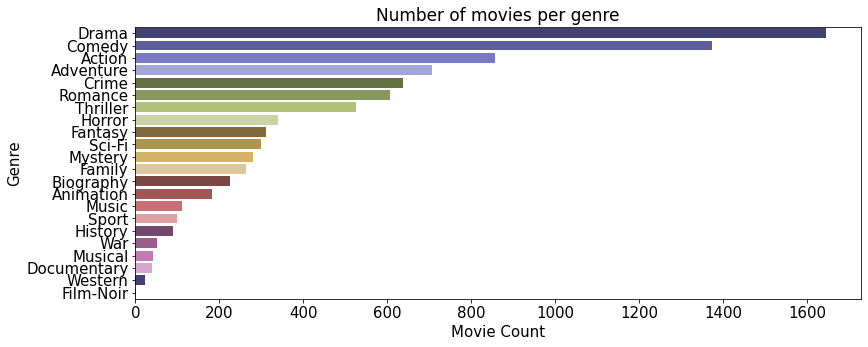

In [68]:
#counting movies per genre
genres_count = genre_movies_df['genres'].value_counts()
genres_count = genres_count.reset_index().rename(columns={'index': 'genres', 'genres': 'count'})

#plotting genres count
plt.figure(figsize = (13,5))
sns.barplot(data = genres_count, x = 'count', y = 'genres', palette = 'tab20b')
plt.title('Number of movies per genre', fontsize = 17)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Genre', fontsize = 15);

In [69]:
#creating a list of genres that have too small sample size, and will not be taken into account when performing analysis
valid_sample_genre_list = list(genres_count['genres'][-7:].values)

#setting genre to be index
genre_movies_test = genre_movies_df.set_index('genres')

#dropping genres that have little to no sample size for further analysis
genre_movies_test = genre_movies_test.drop(valid_sample_genre_list)

In [70]:
#resetting the index
genre_movies_test.reset_index(inplace=True)
genres_final = genre_movies_test.rename(columns = {'index':'genre'})

In [71]:
#genre + profit, genre + budget, genre + ROI, genre + profit_margin dataframes
genres_profit = genres_final.groupby('genres', as_index = False)['profit'].median().sort_values(by = 'profit', ascending = False)
genres_roi = genres_final.groupby('genres', as_index = False)['roi'].median().sort_values(by = 'roi', ascending = False)
genres_budget = genres_final.groupby('genres', as_index = False)['budget ($) millions'].median().sort_values(by = 'budget ($) millions', ascending = False)
genres_profit_margin = genres_final.groupby('genres', as_index = False)['profit_margin'].median().sort_values(by = 'profit_margin', ascending = False)

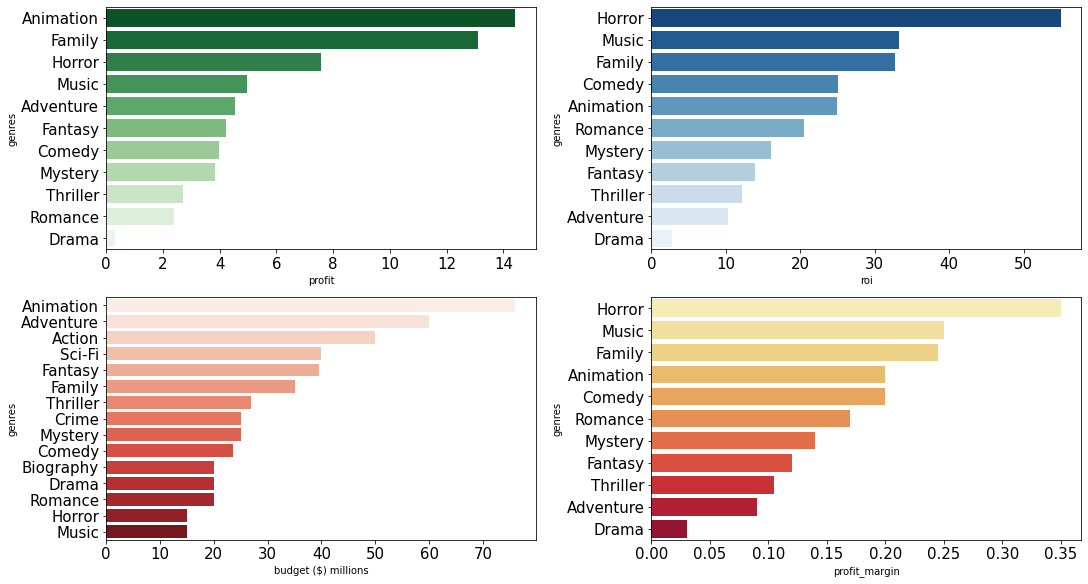

In [72]:
#plotting genre + profit, genre + budget, genre + ROI, genre + profit_margin dataframes
fig,ax =  plt.subplots(2, 2,figsize = (15, 8), constrained_layout = True)

sns.barplot(data = genres_profit[genres_profit['profit'] > 0], 
            x = 'profit', y = 'genres', palette = 'Greens_r', ax = ax[0][0])
sns.barplot(data = genres_roi[genres_roi['roi'] > 0], 
            x = 'roi', y = 'genres', palette = 'Blues_r', ax = ax[0][1])
sns.barplot(data = genres_budget, 
            x = 'budget ($) millions', y = 'genres', palette = 'Reds', ax = ax[1][0])
sns.barplot(data = genres_profit_margin[genres_profit_margin['profit_margin'] > 0], 
            x = 'profit_margin', y = 'genres', palette = 'YlOrRd', ax = ax[1][1]);

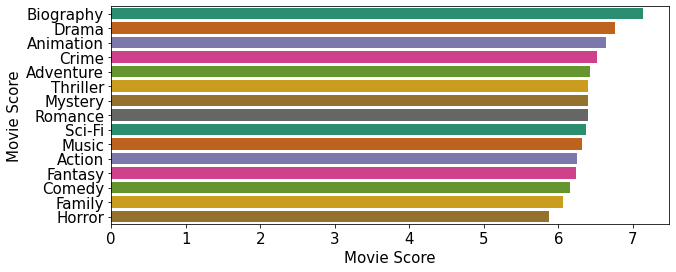

In [73]:
#visualizing top genres, and theiw average movie score

genres_score = genres_final.groupby('genres', as_index = False)['movie_score'].mean().sort_values(by='movie_score', ascending = False)
genres_score.reset_index(inplace = True)

plt.figure(figsize = (10,4))
sns.barplot(data = genres_score, x = 'movie_score', y = 'genres', palette = 'Dark2')
plt.xlabel('Movie Score', fontsize = 15)
plt.ylabel('Movie Score', fontsize = 15)
plt.show();

# **Is there a pattern in common plot keywords with successful movies?**

- No relevant conclusion was made

In [74]:
# #creating a wordcloud function
# def plot_wordcloud(wordcloud):
#     """
#     This function sets the plotting parameters for the given wordcloud.
#     """
#     plt.figure(figsize=(12, 8))
#     plt.imshow(wordcloud)
#     plt.title('Most common words:')
#     plt.axis('off');

In [110]:
#plot keywords with profit_margin larger than 0.6
plotwords_profit_margin = movies[(movies['profit_margin'] > 0.6) & (movies['profit'] > 0)]['plot_keywords']

In [188]:
#instantiating regex tokenizer that removes punctuation
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

#applying the tokenizer to our text, and lowering all cases
movies['plot_keywords'] = movies['plot_keywords'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [230]:
X = movies['plot_keywords'].apply(lambda x : ' '.join(x))

In [231]:
X

0                  avatar future marine native paraplegic
1       goddess marriage ceremony marriage proposal pi...
2                     bomb espionage sequel spy terrorist
3       deception imprisonment lawlessness police offi...
4       alien american civil war male nipple mars prin...
                              ...                        
3405       business trip love misogynist office secretary
3406    austin texas moon pap smear texas twenty somet...
3407         absurd humor egg gross out humor lesbian sex
3408    changing the future independent film invention...
3409    actress name in title crush date four word tit...
Name: plot_keywords, Length: 3410, dtype: object

In [207]:
X = X.reset_index()

In [209]:
X = X['plot_keywords'].tolist()

In [217]:
X = [word for line in X for word in line.split()]

In [226]:
X

['avatar',
 'future',
 'marine',
 'native',
 'paraplegic',
 'goddess',
 'marriage',
 'ceremony',
 'marriage',
 'proposal',
 'pirate',
 'singapore',
 'bomb',
 'espionage',
 'sequel',
 'spy',
 'terrorist',
 'deception',
 'imprisonment',
 'lawlessness',
 'police',
 'officer',
 'terrorist',
 'plot',
 'alien',
 'american',
 'civil',
 'war',
 'male',
 'nipple',
 'mars',
 'princess',
 '17th',
 'century',
 'based',
 'on',
 'fairy',
 'tale',
 'disney',
 'flower',
 'tower',
 'artificial',
 'intelligence',
 'based',
 'on',
 'comic',
 'book',
 'captain',
 'america',
 'marvel',
 'cinematic',
 'universe',
 'superhero',
 'blood',
 'book',
 'love',
 'potion',
 'professor',
 'based',
 'on',
 'comic',
 'book',
 'batman',
 'sequel',
 'to',
 'a',
 'reboot',
 'superhero',
 'superman',
 'crystal',
 'epic',
 'lex',
 'luthor',
 'lois',
 'lane',
 'return',
 'to',
 'earth',
 'action',
 'hero',
 'attempted',
 'rape',
 'bond',
 'girl',
 'official',
 'james',
 'bond',
 'series',
 'revenge',
 'box',
 'office',
 'hi

In [232]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
result = transformer.fit_transform(X)

ValueError: could not convert string to float: 'avatar future marine native paraplegic'

In [221]:
result.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [228]:
s = pd.Series(dict(zip(vectorizer.get_feature_names(), result.toarray()[0])))
s[s > 0].sort_values(ascending=False)[:20]

avatar    1.0
dtype: float64

In [224]:
s[s>0]

avatar    1.0
dtype: float64

In [225]:
len(s)

5017

In [145]:
# wordcloud_profit_margin = WordCloud(width = 1500, height = 500, 
#                       random_state = 42, background_color = 'white', 
#                       colormap = 'Accent', collocations = False, 
#                       max_words = 50, stopwords = STOPWORDS).generate(' '.join(plotwords_profit_margin))
# plot_wordcloud(wordcloud_profit_margin)

In [77]:
# #plot keywords with top 4 genres Comedy, Action, Drama, and Adventure
# top_4_genres = ['Action', 'Comedy', 'Adventure', 'Drama']
# plotwords_genres = movies[movies['genres'].isin(top_4_genres)]['plot_keywords']

In [78]:
# wordcloud_top_genres = WordCloud(width = 1500, height = 500, 
#                       random_state = 42, background_color = 'white', 
#                       colormap = 'Dark2', collocations = False, 
#                       max_words = 50, stopwords = STOPWORDS).generate(' '.join(plotwords_genres))
# plot_wordcloud(wordcloud_top_genres)

In [79]:
# #plot keywords movies_profitable_sorted
# plotwords_most_profitable = movies_profitable_sorted['plot_keywords'][:30]

In [80]:
# wordcloud_top_most_profitable = WordCloud(width = 1500, height = 500, 
#                       random_state = 42, background_color = 'white', 
#                       colormap = 'Set2', collocations = False, 
#                       max_words = 50, stopwords = STOPWORDS).generate(' '.join(plotwords_most_profitable))
# plot_wordcloud(wordcloud_top_most_profitable)

In [81]:
# #creating a lost of top 30 actors and their movies
# list_top_30_actors = list(actor1_top30['actor_1_name'])
# plotwords_top30_actor = movies[movies['actor_1_name'].isin(list_top_30_actors)]['plot_keywords']

In [82]:
# wordcloud_top30_actor = WordCloud(width = 1500, height = 500, 
#                       random_state = 42, background_color = 'white', 
#                       colormap = 'tab20', collocations = False, 
#                       max_words = 50, stopwords = STOPWORDS).generate(' '.join(plotwords_top30_actor))
# plot_wordcloud(wordcloud_top30_actor)

In [83]:
# #creating a wordcloud with most common plotkeywords for horror movies
# plotwords_test = movies[movies['genres'] == 'Horror']['plot_keywords']

In [84]:
# wordcloud_test = WordCloud(width = 1500, height = 500, 
#                       random_state = 42, background_color = 'white', 
#                       colormap = 'Set1', collocations = False, 
#                       max_words = 50, stopwords = STOPWORDS).generate(' '.join(plotwords_test))
# plot_wordcloud(wordcloud_test)

# **Are duration and content rating of the movie relevant to profit?**

**Conclusion**: Focus on PG-13 movies, as the most common profitable genres (Animation, Adventure, Family) are in this group.

**Duration**

<Figure size 1080x504 with 0 Axes>

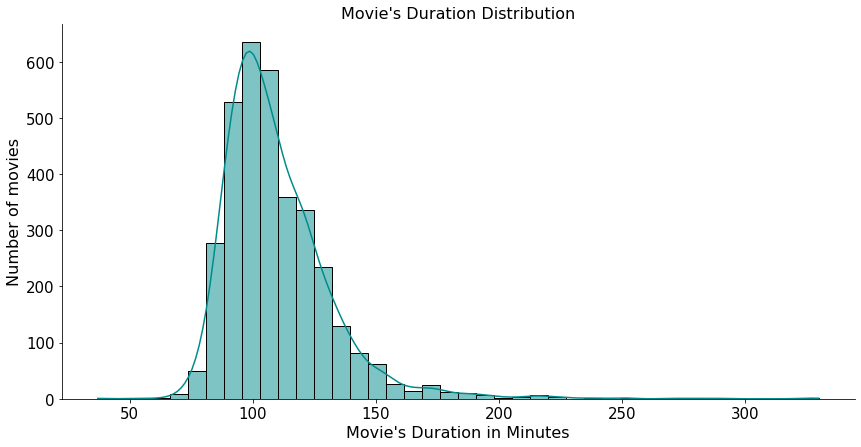

In [85]:
#visualizing the distribution of movie's scores
plt.figure(figsize = (15,7))
sns.displot(movies['duration'], kde = True, height = 6, aspect = 2, color = 'darkcyan', bins = 40)
plt.title("Movie's Duration Distribution", fontsize = 16)
plt.xlabel("Movie's Duration in Minutes", fontsize = 16)
plt.ylabel('Number of movies', fontsize = 16);

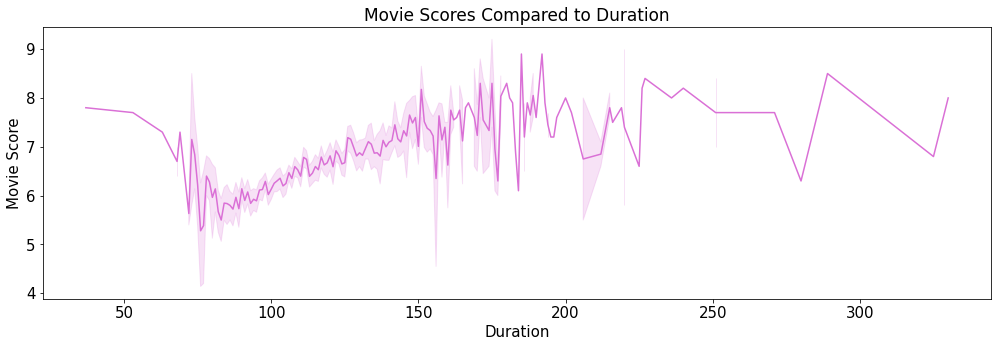

In [86]:
#visualizing duration and movie score
plt.figure(figsize=(17,5))
sns.lineplot(data = movies, x = 'duration', y = 'movie_score', color = 'orchid')
plt.xlabel('Duration',fontsize = 15)
plt.ylabel('Movie Score',fontsize = 15)
plt.title('Movie Scores Compared to Duration', fontsize = 17);

In [87]:
#correlation between duration and: profit, profit margin and movie score
duration_corr = movies[['duration', 'profit', 'profit_margin','budget', 'movie_score']]
duration_corr.corr()

,duration,profit,profit_margin,budget,movie_score
duration,1.000000,0.108516,0.015485,0.285337,0.382004
profit,0.108516,1.000000,0.090494,0.042716,0.281146
profit_margin,0.015485,0.090494,1.000000,0.018596,0.030936
budget,0.285337,0.042716,0.018596,1.000000,0.059691
movie_score,0.382004,0.281146,0.030936,0.059691,1.000000


**Content rating**

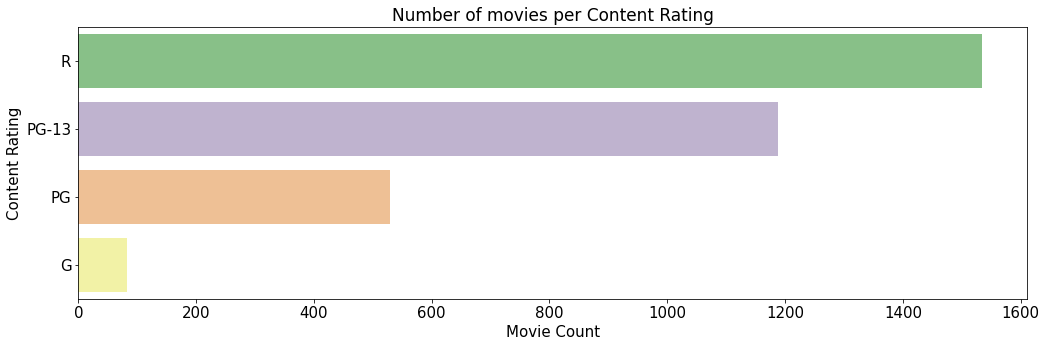

In [88]:
#plotting content rating and movie count
rating_count = movies.groupby('content_rating', as_index = False)['movie_title'].count().sort_values(by='movie_title', ascending = False)[:4]

plt.figure(figsize=(17,5))
sns.barplot(x = 'movie_title', y = 'content_rating', data = rating_count, palette = 'Accent')
plt.title('Number of movies per Content Rating', fontsize = 17)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Content Rating', fontsize = 15);

In [89]:
#creating an array of content rating values
rating_sep = movies.groupby('content_rating', as_index = False)['movie_title'].count().sort_values(by='movie_title', ascending = False)
rating_sep['content_rating'].values

array(['R', 'PG-13', 'PG', 'G', 'Not Rated', 'Unrated', 'Approved', 'X',
       'NC-17', 'Passed', 'M', 'GP'], dtype=object)

In [90]:
#creating a list of content_rating that have too small sample size, and will not be taken into account when performing analysis
valid_sample_rating_list = list(rating_sep['content_rating'][-8:].values)

#setting genre to be index
rating_movies_test = movies.set_index('content_rating')

#dropping genres that have little to no sample size for further analysis
rating_movies_test = rating_movies_test.drop(valid_sample_rating_list)

In [91]:
#resetting the index
rating_movies_test.reset_index(inplace=True)
rating_final = rating_movies_test.rename(columns = {'index':'content_rating'})

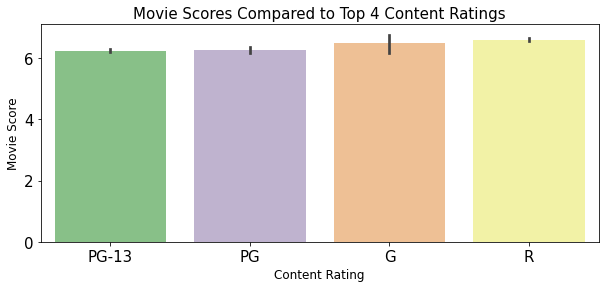

In [92]:
plt.figure(figsize=(10,4))
sns.barplot(data = rating_final, x = 'content_rating', y = 'movie_score', palette = 'Accent')
plt.xlabel('Content Rating',fontsize = 12)
plt.ylabel('Movie Score',fontsize = 12)
plt.title('Movie Scores Compared to Top 4 Content Ratings', fontsize = 15);

In [93]:
#content rating and profit, profit_margin,score, and budget

rating_profit = rating_final.groupby('content_rating', as_index = False)[['profit', 
                                                  'profit_margin', 
                                                  'budget ($) millions', 
                                                  'movie_score']].median().sort_values(by = 'profit', ascending = False)
rating_profit

,content_rating,profit,profit_margin,budget ($) millions,movie_score
0,G,15.280,0.260,30.0,6.6
1,PG,11.060,0.240,33.0,6.4
2,PG-13,2.825,0.105,35.0,6.3
3,R,0.470,0.040,17.0,6.6


# **How do number of users voted, and number of critical reviews impact profit?**

**Conclusion:** There are no significant strategies to be recommended without having specific demographic information about users voted, users reviews, and number of critic reviews.

In [94]:
#mean and median values
movies[['num_critic_reviews','num_voted_mill','num_users_voted','num_user_reviews']].describe()

,num_critic_reviews,num_voted_mill,num_users_voted,num_user_reviews
count,3410.000000,3410.000000,3.410000e+03,3410.000000
mean,162.949560,0.105246,1.053108e+05,330.038123
std,122.144766,0.154043,1.539606e+05,405.356471
min,2.000000,0.000000,9.100000e+01,4.000000
25%,75.000000,0.020000,1.902500e+04,108.000000
50%,133.000000,0.050000,5.308600e+04,207.000000
75%,218.000000,0.130000,1.271668e+05,393.750000
max,813.000000,1.690000,1.689764e+06,5060.000000


In [95]:
#top 10 movies with most vote counts
top10_votes = movies.groupby('movie_title',as_index = False)['profit', 'num_voted_mill'].sum().sort_values(by = 'num_voted_mill', ascending = False)[:10]

top10_votes

,movie_title,profit,num_voted_mill
2978,The Shawshank Redemption,3.34,1.69
2570,The Dark Knight,348.32,1.68
1254,Inception,132.57,1.47
889,Fight Club,-25.98,1.35
1939,Pulp Fiction,99.93,1.32
931,Forrest Gump,274.69,1.25
2796,The Lord of the Rings: The Fellowship of the R...,220.84,1.24
2827,The Matrix,108.38,1.22
2797,The Lord of the Rings: The Return of the King,283.02,1.22
2645,The Godfather,128.82,1.16


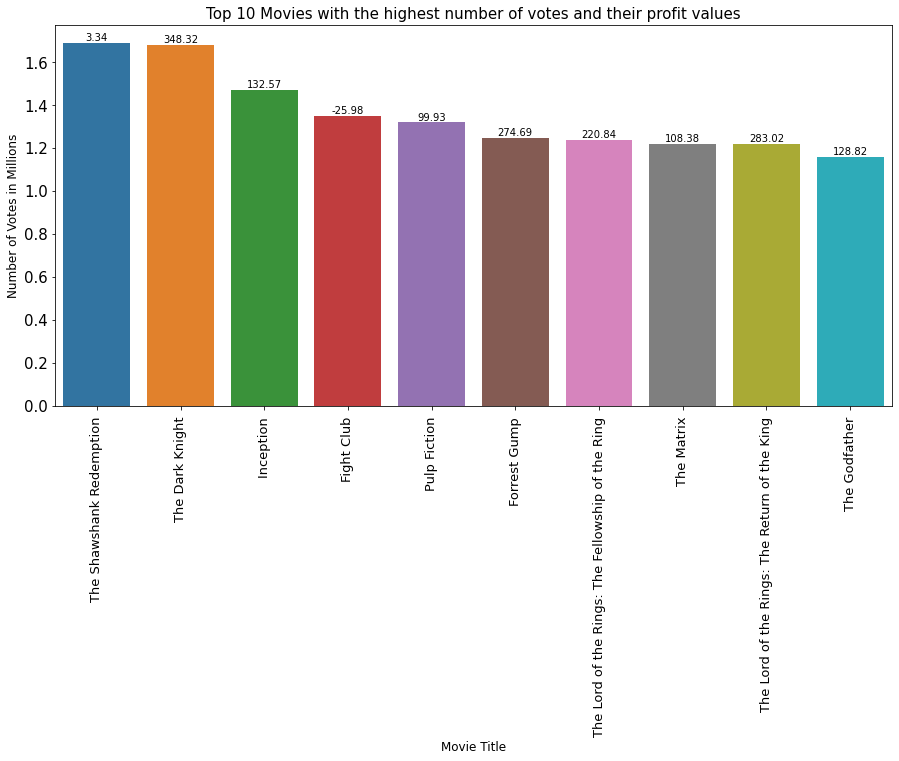

In [96]:
#visualizing top 10 voted movies with their profits
plt.figure(figsize = (15,7))
ax = sns.barplot(data = top10_votes, x = 'movie_title', y =  'num_voted_mill')

for p, value in zip(ax.patches, top10_votes['profit']):
    ax.annotate("%.2f" % value, xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.xlabel('Movie Title',fontsize = 12)
plt.xticks(rotation = 90, fontsize = 13)
plt.ylabel('Number of Votes in Millions',fontsize = 12)

plt.title('Top 10 Movies with the highest number of votes and their profit values', fontsize = 15);
# plt.savefig('top10_votes_profit.png');

In [97]:
#assessing correlation between number of votes, critical reviews and users voted with profit and profit margin
reviews_cotes_profit_corr = movies[['num_critic_reviews', 'num_users_voted', 'num_user_reviews',
                                   'profit', 'profit_margin']]
reviews_cotes_profit_corr.corr()

,num_critic_reviews,num_users_voted,num_user_reviews,profit,profit_margin
num_critic_reviews,1.000000,0.593035,0.557575,0.234495,0.056898
num_users_voted,0.593035,1.000000,0.788390,0.501590,0.044738
num_user_reviews,0.557575,0.788390,1.000000,0.390425,0.048647
profit,0.234495,0.501590,0.390425,1.000000,0.090494
profit_margin,0.056898,0.044738,0.048647,0.090494,1.000000


**Genres and Number of user voted, number of user reviews**

In [98]:
genre_reviews = genres_final.groupby('genres', 
                                     as_index = False)[['num_users_voted',
                                                        'num_user_reviews',
                                                        'num_critic_reviews']].sum().sort_values(by = 'num_users_voted', ascending = False)

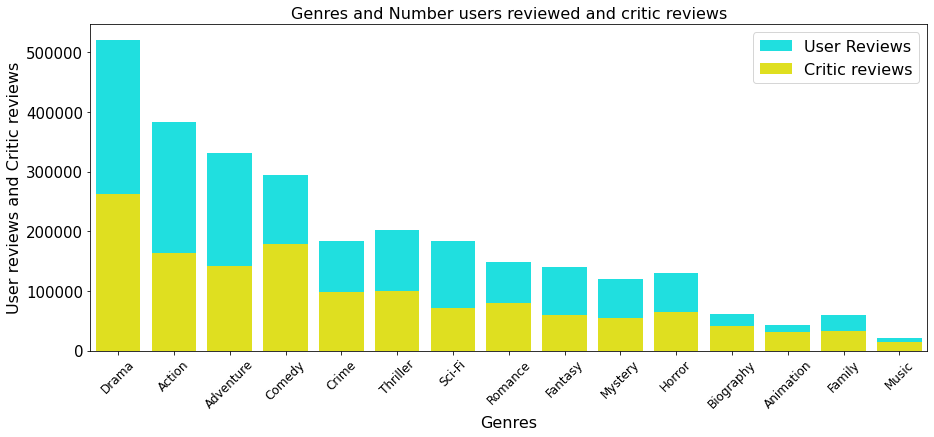

In [99]:
#visualizing Genres and Number users reviewed and critic reviews
plt.figure(figsize=(15,6))

sns.barplot(data = genre_reviews, x = 'genres', y = 'num_user_reviews', color = 'cyan', label = 'User Reviews', ci = None)            
sns.barplot(data = genre_reviews, x = 'genres', y = 'num_critic_reviews', color = 'yellow', label = 'Critic reviews', ci = None)            

plt.xlabel('Genres', fontsize = 16)
plt.title('Genres and Number users reviewed and critic reviews', fontsize = 16)
plt.ylabel('User reviews and Critic reviews', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12)
plt.legend(fontsize = 16);
# plt.savefig('reviews_and_critic_genres.png')

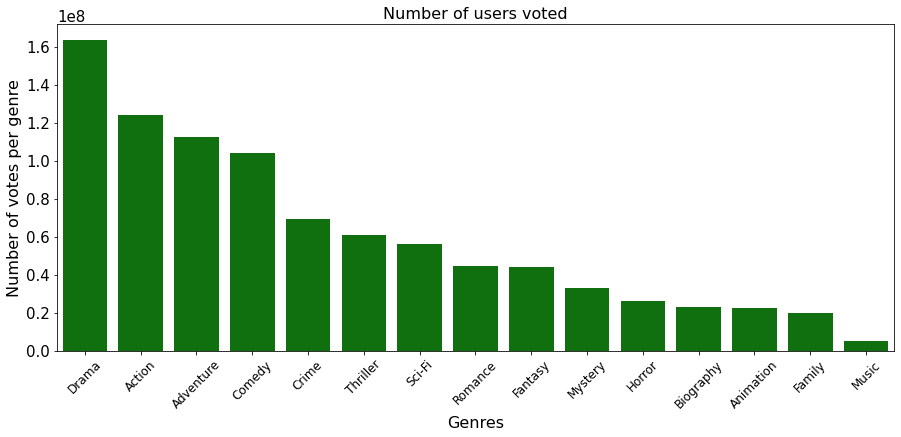

In [100]:
#visualizing number of users voted per genre
plt.figure(figsize=(15,6))
sns.barplot(data = genre_reviews, x = 'genres', y = 'num_users_voted', color = 'green', label = 'Users Voted', ci = None)
plt.xlabel('Genres', fontsize = 16)
plt.title('Number of users voted', fontsize = 16)
plt.ylabel('Number of votes per genre', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12);

**Profit and Number of user voted, number of user reviews**

Text(0.5, 1.0, 'Profit and number of users voted')

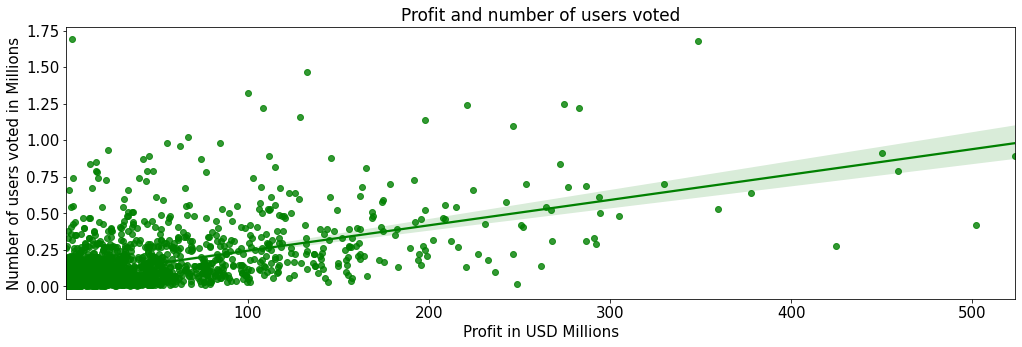

In [101]:
#visualizing profit and number of users voted
plt.figure(figsize=(17,5))
sns.regplot(data = movies[movies['profit'] > 0], 
             x = 'profit', y = 'num_voted_mill', color = 'green')
plt.xlabel('Profit in USD Millions',fontsize = 15)
plt.ylabel('Number of users voted in Millions',fontsize = 15)
plt.title('Profit and number of users voted', fontsize = 17)
# plt.savefig('reviews_and_critic_genres.png');